In [904]:
#Reading important libraries
import pandas as pd
import numpy as np


# Set Pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

import seaborn             as sns
import matplotlib.pyplot   as plt

In [905]:
#Helper function for plotting
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
#Extracting driver Id from driver column using Regex
import re

def extract_text_inside_brackets(input_text):
    # Define a regular expression pattern to match text inside round brackets
    input_text = str(input_text)
    pattern = r'\((.*?)\)'  # This pattern captures everything between '(' and ')'

    # Use re.search to find the first match
    match = re.search(pattern, input_text)

    # Return the matched text (if any), or None
    return match.group(1) if match else None

### TMS

In [906]:

import pandas as pd
import numpy as np

path = "C:/Users/Admin/Downloads/"

In [907]:
df = pd.read_csv(path+"TMS_Combined.csv")
df.head(2)

sr. no.   month  settlement_id  vehicle_no ownership            brand  \
0        1  1-2023  110HR38V29991   HR38V2999     Hired  TATA Motors Ltd   
1        2  1-2023   HR2223FTS647  NL01AG0986     Owned  TATA Motors Ltd   

  body_type  year      branch                     customer  \
0       TOT  2015  Carterpuri  Reliance Industries Limited   
1      TR08  2012    Haridwar   Mahindra Logistics Limited   

                               driver  \
0                     Ram Ashis Yadav   
1  Vinod Kumar S/o Har Prasad (d1795)   

                                               route           from   \
0  Hoskote- R N E - Moti Khavadi Via Elecronic Ci...  Hoskote- R N E   
1  Haridwar - Dimapur Via Najijabad- Rudrapur- Ba...        Haridwar   

  from_zone            to to_zone           start_date             end_date  \
0     South  Moti Khavadi    West  22-12-2022 10:05:00  01-01-2023 10:10:00   
1     North       Dimapur    East  22-12-2022 21:00:00  04-01-2023 19:55:00   

   load_km  empty_km  income  vehicle_freight  hire_charges  fuel_exp  \
0     1870         0  192500           192500        155000     56070   
1     2300      2300  216844           216844             0    131423   

   cash_exp  fasttag  driver_salary  fooding  maintenance  tyre  battery  \
0         0        0              0        0            0     0        0   
1     23961    25155              0     7250            0     0        0   

   document  
0         0  
1         0

In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16037 entries, 0 to 16036
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sr. no.          16037 non-null  int64 
 1   month            16037 non-null  object
 2   settlement_id    15793 non-null  object
 3   vehicle_no       16030 non-null  object
 4   ownership        16030 non-null  object
 5   brand            16029 non-null  object
 6   body_type        16023 non-null  object
 7   year             16037 non-null  int64 
 8   branch           15800 non-null  object
 9   customer         15725 non-null  object
 10  driver           15790 non-null  object
 11  route            15793 non-null  object
 12  from             15793 non-null  object
 13  from_zone        15793 non-null  object
 14  to               15793 non-null  object
 15  to_zone          15793 non-null  object
 16  start_date       15793 non-null  object
 17  end_date         15793 non-null

In [909]:
df['start_date'] = pd.to_datetime(df['start_date'], format = '%d-%m-%Y %H:%M:%S' )

In [910]:
df['month_sd'] = df['start_date'].dt.month

In [911]:
df['end_date'] = pd.to_datetime(df['end_date'], format = '%d-%m-%Y %H:%M:%S' )

In [912]:
df['month_ed'] = df['end_date'].dt.month

In [913]:
###Expenses 
### Vehicle running expenses
df["vehicle_running_expense"] = df["hire_charges"] + df['fuel_exp'] + df['cash_exp'] + df['fasttag'] + df['document']

### Driver level expenses
df["driver_expense"] = df["fooding"] + df["driver_salary"]

### Vehicle maintenance expense
df['vehicle_maintenance'] = df['maintenance'] + df['tyre'] + df['battery']

### Overall expense
df['expense'] = df["vehicle_running_expense"] + df["driver_expense"] + df['vehicle_maintenance']

In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16037 entries, 0 to 16036
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sr. no.                  16037 non-null  int64         
 1   month                    16037 non-null  object        
 2   settlement_id            15793 non-null  object        
 3   vehicle_no               16030 non-null  object        
 4   ownership                16030 non-null  object        
 5   brand                    16029 non-null  object        
 6   body_type                16023 non-null  object        
 7   year                     16037 non-null  int64         
 8   branch                   15800 non-null  object        
 9   customer                 15725 non-null  object        
 10  driver                   15790 non-null  object        
 11  route                    15793 non-null  object        
 12  from                     15793 n

In [915]:
#Calculating trip days -- No of days vehicle was on trip
df['trip_days'] = (df['end_date'] - df['start_date']).dt.days

In [916]:
df['trip_hours'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 3600

### Number of unique vehicles in a month (Trip end)

##### Number of vehicles are fluctuating each month in MIS data we need to have a active vehicle record for each month.

In [917]:
df.groupby('month_ed')["vehicle_no"].nunique()

month_ed
1.0     297
2.0     301
3.0     313
4.0     303
5.0     300
6.0     298
7.0     301
8.0     308
9.0     361
10.0    376
Name: vehicle_no, dtype: int64

### Number of unique vehicles in a month (Trip start)

##### MAX  in October
##### MIN in June

In [918]:
df.groupby('month_sd')["vehicle_no"].nunique()

month_sd
1.0     296
2.0     302
3.0     314
4.0     298
5.0     297
6.0     295
7.0     301
8.0     310
9.0     367
10.0    376
12.0    110
Name: vehicle_no, dtype: int64

In [919]:
df.trip_days.sort_values(ascending = False)

1441     112.0
6145      32.0
14022     23.0
16002     18.0
10703     16.0
6377      16.0
3667      16.0
3057      15.0
3058      15.0
1910      14.0
1442      14.0
14008     14.0
8923      13.0
9322      13.0
9454      13.0
14731     13.0
4633      13.0
9436      13.0
5075      13.0
16005     13.0
3203      12.0
7513      12.0
1         12.0
9453      12.0
12631     12.0
6341      12.0
9401      12.0
9845      12.0
9743      12.0
9365      11.0
12875     11.0
7514      11.0
11580     11.0
791       11.0
7515      11.0
1705      11.0
4833      11.0
853       11.0
9928      11.0
10881     11.0
33        11.0
286       11.0
12172     11.0
5033      11.0
12397     11.0
12165     10.0
3811      10.0
3349      10.0
9435      10.0
13010     10.0
9448      10.0
8118      10.0
12362     10.0
0         10.0
14568     10.0
9106      10.0
752       10.0
12859     10.0
3630      10.0
4609      10.0
7069      10.0
6475      10.0
876       10.0
10542     10.0
4634      10.0
8306      10.0
4644      

## RED FLAGS

### LOAD KM showing zero -- Hired Vehicle (No impact of metrics)
### At third load KM is large vehicle freight is less but fuel expenses are high (Will impact metrics )

#### There are such uncertainities in data because of data entry error or other reasons 

In [920]:
df[df.trip_days == 16.0]

sr. no.   month   settlement_id  vehicle_no ownership            brand  \
3667       611  3-2023  110NL01AF31741  NL01AF3174     Hired  TATA Motors Ltd   
6377       284  5-2023     NP2324FTS68  HR55AH0427     Owned         Mahindra   
10703      252  8-2023   GM2324FTS1229  HR55AD5848     Owned  TATA Motors Ltd   

      body_type  year      branch                             customer  \
3667        NaN     0  Carterpuri  Mahindra Logistics Limited-(yuvraj)   
6377       TR08  2019       Noida           Cnh Industrial (i) Pvt Ltd   
10703      TR08  2018  Carterpuri                     Anurag Roadlines   

                                             driver  \
3667                                        KISHORE   
6377           Ravi Shankar S/o Shivshankar (d1208)   
10703  Tilak Ram Tiwari S/o Sant Ram Tiwari (d0266)   

                                                   route      from  from_zone  \
3667   Jaipur - Anand Via Bhilwara, Udaipur, Shamalaj...     Jaipur     North   
6377   Noida - Nagpur Via Hodal, Gwalior, Jhansi, Sag...      Noida     North   
10703  Dibrugarh - Manesar Via Guwahati, Siliguri, Da...  Dibrugarh      East   

            to to_zone          start_date            end_date  load_km  \
3667     Anand    West 2023-03-11 07:55:00 2023-03-27 12:18:24        0   
6377    Nagpur    West 2023-05-03 21:20:00 2023-05-20 17:00:00     1050   
10703  Manesar   North 2023-08-02 15:30:01 2023-08-19 10:10:00     2380   

       empty_km  income  vehicle_freight  hire_charges  fuel_exp  cash_exp  \
3667          0   41543            41543         36500         0         0   
6377          0   71978            71978             0     33846      7789   
10703         0   28000            28000             0     67644      5876   

       fasttag  driver_salary  fooding  maintenance  tyre  battery  document  \
3667         0              0        0            0     0        0         0   
6377     10695          15000     7750         1132     0        0      7602   
10703    15695              0        0            0     0        0         0   

       month_sd  month_ed  vehicle_running_expense  driver_expense  \
3667        3.0       3.0                    36500               0   
6377        5.0       5.0                    59932           22750   
10703       8.0       8.0                    89215               0   

       vehicle_maintenance  expense  trip_days  trip_hours  
3667                     0    36500       16.0  388.390000  
6377                  1132    83814       16.0  403.666667  
10703                    0    89215       16.0  402.666389

In [921]:
#Red Flags
df[df.trip_days == 18.0]

sr. no.    month  settlement_id  vehicle_no ownership            brand  \
16002     1995  10-2023  GM2324FTS1707  NL01AH0140     Owned  TATA Motors Ltd   

      body_type  year      branch                       customer  \
16002      TR08  2023  Carterpuri  Tata Motors Pv Ltd, Ahmedabad   

                                        driver  \
16002  Sonu Kumar Bind S/o Kailash Bind(d1367)   

                                                   route    from  from_zone  \
16002  Manesar - Jd Engineering Via Pataudi Road Work...  Manesar     North   

                   to to_zone          start_date            end_date  \
16002  Jd Engineering   North 2023-09-23 11:00:00 2023-10-11 15:00:00   

       load_km  empty_km  income  vehicle_freight  hire_charges  fuel_exp  \
16002        0       125       0                0             0      2853   

       cash_exp  fasttag  driver_salary  fooding  maintenance  tyre  battery  \
16002         0      735              0        0            0     0        0   

       document  month_sd  month_ed  vehicle_running_expense  driver_expense  \
16002         0       9.0      10.0                     3588               0   

       vehicle_maintenance  expense  trip_days  trip_hours  
16002                    0     3588       18.0       436.0

In [922]:
#Red Flags
df[df.trip_days == 11.0]

sr. no.   month    settlement_id  vehicle_no ownership  \
33          34  1-2023     RD2223FTS697  PB11CF5245     Owned   
286        287  1-2023     PU2223FTS584   HR55R5801     Owned   
791        792  1-2023     PU2223FTS621   NL01N4765     Owned   
853        854  1-2023    CH2223FTS1715  HR55AE9665     Owned   
1705       265  2-2023  CARTE2223FTS724  NL01AF9397     Owned   
4833       201  4-2023      HR2324FTS84  NL01AG5615     Owned   
5033       401  4-2023     RD2324FTS272  NL01AF5631     Owned   
7514         2  6-2023  CARTE2324FTS418  NL01AE7833     Owned   
7515         3  6-2023     RD2324FTS404  PB11CB7794     Owned   
9365       443  7-2023     RD2324FTS492  PB65AD6988     Owned   
9928      1006  7-2023    HSR2324FTS375  NL01AE7833     Owned   
10881      430  8-2023    GM2324FTS1302  HR55AE9866     Owned   
11580     1129  8-2023  CARTE2324FTS628  NL01AG3954     Owned   
12172        9  9-2023  CARTE2324FTS661  NL01AG3676     Owned   
12397      234  9-2023  CARTE2324FTS761    KA425680     Owned   
12875      712  9-2023    GM2324FTS1537  NL01AE8891     Owned   

                  brand body_type  year      branch  \
33      TATA Motors Ltd      TR08  2017       Hosur   
286     TATA Motors Ltd      TR08  2012     Manesar   
791     TATA Motors Ltd      TR08  2016  Carterpuri   
853     TATA Motors Ltd      TR08  2018     Chennai   
1705   Ashok Leyand Ltd       TOT  2012       Hosur   
4833    TATA Motors Ltd      TR08  2013    Haridwar   
5033    TATA Motors Ltd      TR08  2022       Hosur   
7514    TATA Motors Ltd      TR08  2010       Hosur   
7515    TATA Motors Ltd      TR08  2017        Pune   
9365    TATA Motors Ltd      TR08  2016   Pantnagar   
9928    TATA Motors Ltd      TR08  2010       Noida   
10881   TATA Motors Ltd      TR08  2018        Pune   
11580   TATA Motors Ltd      TR08  2022  Zaheerabad   
12172  Ashok Leyand Ltd       TOT  2012  Carterpuri   
12397   TATA Motors Ltd      TR08  2010       Hosur   
12875            Eicher      TR08  2021  Carterpuri   

                                   customer  \
33                  Ashok Leyland Ltd Hosur   
286               Dlg Car Transport Company   
791    Mahindra Logistics Limited -(swaraj)   
853               Byd India Private Limited   
1705                     Ashok Leyland Ltd.   
4833             Mahindra Logistics Limited   
5033                Ashok Leyland Ltd Hosur   
7514                Ashok Leyland Ltd Hosur   
7515             Mahindra Logistics Limited   
9365             Tata Motors Ltd, Pantnagar   
9928             Cnh Industrial (i) Pvt Ltd   
10881            Mahindra Logistics Limited   
11580            Mahindra Logistics Limited   
12172                    Ashok Leyland Ltd.   
12397               Ashok Leyland Ltd Hosur   
12875                      Anurag Roadlines   

                                              driver  \
33             Belal Ansari S/o Akbar Ansari (d2078)   
286          Shahban Ansari S/o Yusuf Ansari (d2040)   
791                Kanhiya Lal S/o Ram Sevak (d1380)   
853           Shubham Ojha S/o Virendra Ojha (d1840)   
1705           Rukmuddin S/o Tajamul Hussain (d0870)   
4833        Dinesh Prasad S/o Surendra Singh (d1629)   
5033       Siva Nath Kashyap S/o Mohan Pandey(d0733)   
7514              Arbaz Khan S/o Akhtar Khan (d2158)   
7515   Surya Pratap S/o Bhagvat Prasad Yadav (d2121)   
9365           Dinesh Kumar S/o Kripa Shankar(d1263)   
9928              Arbaz Khan S/o Akhtar Khan (d2158)   
10881        Sanjay Tiwari S/o Ramjag Tiwari (d0250)   
11580     Bal Mukund Panday S/o Mohan Panday (d0139)   
12172          Yunus Ansari S/o Usman Ansari (d0552)   
12397           Suntaj Khan S/o Imteyaz Khan (d2157)   
12875             Pramod Kumar S/o Choke Lal (d0541)   

                                                   route       from   \
33     Hosur - Guwahati Via Hyderabad, Nagpur, Jabalp...       Hosur   
286       Gurgaon - Pune Via Gwalior, Guna, Maksi, Dhule     Gurgaon

### Red flag Owned Vehicle with hire charges

In [923]:
df[(df.ownership == "Owned") & (df.hire_charges > 1)]

sr. no.   month  settlement_id  vehicle_no ownership            brand  \
12166        3  9-2023  GM2324FTS1311   NL01Q5972     Owned  TATA Motors Ltd   
12171        8  9-2023  GM2324FTS1312  NL01AA7407     Owned  TATA Motors Ltd   
12257       94  9-2023  110NL01Q59701   NL01Q5970     Owned  TATA Motors Ltd   
12592      429  9-2023  GM2324FTS1434  NL01AC1021     Owned  TATA Motors Ltd   
12659      496  9-2023  GM2324FTS1965  NL01AB6137     Owned  TATA Motors Ltd   
12666      503  9-2023  GM2324FTS1994  NL01AB6142     Owned  TATA Motors Ltd   
13218     1055  9-2023  GM2324FTS1558  NL01AB4912     Owned  TATA Motors Ltd   

      body_type  year   branch                   customer  \
12166      TR08  2016  Chennai  Byd India Private Limited   
12171      TR08  2017  Chennai  Byd India Private Limited   
12257      TR08  2016  Chennai  Byd India Private Limited   
12592      TR08  2018  Chennai  Byd India Private Limited   
12659      TR08  2018  Chennai  Byd India Private Limited   
12666      TR08  2018  Chennai  Byd India Private Limited   
13218      TR08  2018  Chennai  Byd India Private Limited   

                        driver  \
12166            SARFARAJ KHAN   
12171  Md Jainul Ansari(D1673)   
12257             ISRAN ANSARI   
12592            SHOBHIT DIXIT   
12659               SUBODH RAY   
12666           YASHWANT SINGH   
13218                  NAVNEET   

                                                   route    from  from_zone  \
12166  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   
12171  Chennai - Gurgaon Via Nellore- Nalgonda- Hyd- ...  Chennai     South   
12257  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   
12592  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   
12659  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   
12666  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   
13218  Chennai - Faridabad Via Nellore, Hyderabad, Na...  Chennai     South   

              to to_zone          start_date            end_date  load_km  \
12166  Faridabad   North 2023-08-24 14:25:00 2023-09-02 12:55:00     2150   
12171    Gurgaon   North 2023-08-25 14:00:00 2023-09-02 12:55:00     2175   
12257  Faridabad   North 2023-08-30 17:00:00 2023-09-09 12:11:37     2150   
12592  Faridabad   North 2023-09-05 19:00:00 2023-09-10 14:30:00     2150   
12659  Faridabad   North 2023-09-06 18:50:00 2023-09-13 10:30:00     2150   
12666  Faridabad   North 2023-09-06 19:00:00 2023-09-15 09:00:00     2150   
13218  Faridabad   North 2023-09-16 18:00:00 2023-09-24 11:00:00     2150   

       empty_km  income  vehicle_freight  hire_charges  fuel_exp  cash_exp  \
12166        80  150000           150000        135000     64739         0   
12171         0  150000           150000        135000     64739         0   
12257        20  150000           150000        135000     64530         0   
12592        80  150000           150000        135000     60879         0   
12659        80  150000           150000        135000     62510         0   
12666         0  150000           150000        135000     63451         0   
13218         0  150000           150000        135000     62457         0   

       fasttag  driver_salary  fooding  maintenance   tyre  battery  document  \
12166      340              0     4500         3126  28343        0         0   
12171      340           3333     7250            0  21399        0         0   
12257        0              0     1750          720  28906        0         0   
12592        0              0     4500            0      0        0         0   
12659        0              0        0          203      0        0         0   
12666        0              0        0            0      0        0         0   
13218        0              0     1250            0  14457        0         0   

       month_sd  month_ed  vehicle_running_expense  driver_expense  \
12166     

### RED Flags Duplicate settlement IDs

In [924]:
df[df.duplicated('settlement_id') & (df.settlement_id.notna())]

sr. no.   month    settlement_id  vehicle_no ownership  \
3062        6  3-2023  CARTE2223FTS768  NL01AF9397     Owned   
8932       10  7-2023     GM2324FTS707  NL01AG1109     Owned   

                 brand body_type  year      branch            customer  \
3062  Ashok Leyand Ltd       TOT  2012  Carterpuri  Ashok Leyland Ltd.   
8932   TATA Motors Ltd      TR08  2022  Carterpuri    Anurag Roadlines   

                                       driver  \
3062    Rukmuddin S/o Tajamul Hussain (d0870)   
8932  Ramanad Yadav S/O Ramkesh Yadav (D1238)   

                                                  route     from  from_zone  \
3062  Hosur - Alwar Via Hyderabad, Nagpur, Jhansi, G...     Hosur     South   
8932  Dalkhola - Manesar Via Darbhanga, Muzaffarpur,...  Dalkhola      East   

           to to_zone          start_date            end_date  load_km  \
3062    Alwar   North 2023-02-22 12:30:00 2023-03-01 14:36:02     2150   
8932  Manesar   North 2023-06-25 23:55:00 2023-07-02 21:00:00     3700   

      empty_km  income  vehicle_freight  hire_charges  fuel_exp  cash_exp  \
3062         0  137163           137163             0     69166     16066   
8932       915   24640            24640             0    121302     19051   

      fasttag  driver_salary  fooding  maintenance  tyre  battery  document  \
3062    18390           8000     7750            0     0        0         0   
8932    29370           5161     7500         4375     0        0         0   

      month_sd  month_ed  vehicle_running_expense  driver_expense  \
3062       2.0       3.0                   103622           15750   
8932       6.0       7.0                   169723           12661   

      vehicle_maintenance  expense  trip_days  trip_hours  
3062                    0   119372        7.0  170.100556  
8932                 4375   186759        6.0  165.083333

### Hired Vehicles
#### Points

In [925]:
df.ownership.value_counts()

ownership
Owned    15860
Hired      170
Name: count, dtype: int64

##### Total number of trips for hired vehicles

In [926]:
print("Total number of hired trips : ",df[(df.ownership == "Hired")]["settlement_id"].count())

Total number of hired trips :  170


##### Month wise number of trips for hired vehicles

In [927]:
#CHANGE MONTH HERE in numeriacl order 
month_hire = 3

df[(df.ownership == "Hired") & (df.month_sd == month_hire)]["settlement_id"].count()

36

### Branch with most hired vehicles

In [928]:
df[(df.ownership == "Hired")].groupby("branch").size().reset_index()

branch    0
0   Carterpuri   48
1  Head Office    4
2        Hosur  108
3   Ranjangaon    7
4       Sanand    3

#### Overall revenue by hired vehicles

In [929]:
print(df[(df.ownership == "Hired")]['income'].sum(),"INR")

17171099 INR


In [930]:
print("For the month" ,month_hire,"Revenue generated by Hired vehicles is :",df[(df.ownership == "Hired") & (df.month_sd == month_hire)]['income'].sum(),"INR")

For the month 3 Revenue generated by Hired vehicles is : 4077864 INR


#### Point Overall profit for hired vehicles is Negative

In [931]:
df['profit'] = df['income'] - df['expense']
print(df[(df.ownership == "Hired")]['profit'].sum(),"INR")

-502129 INR


#### Number of profit making trips

In [932]:
df[(df.ownership == "Hired") & (df.profit > 0)]['settlement_id'].count()

103

#### Number of loss making trips

In [933]:
df[(df.ownership == "Hired") & (df.profit < 0)]['settlement_id'].count()

66

#### Branch wise loss making trips

In [934]:
df[(df.ownership == "Hired") & (df.profit < 0)].groupby('branch').size()

branch
Carterpuri     14
Head Office     2
Hosur          47
Sanand          3
dtype: int64

#### Reason for negative profit in trips is there are hire charges + fuel expenses both

In [935]:
df[(df.ownership == "Hired") & (df.profit < 0)]

sr. no.    month    settlement_id  vehicle_no ownership  \
0            1   1-2023    110HR38V29991   HR38V2999     Hired   
13          14   1-2023  110NLO1L2204121   NLO1L2204     Hired   
93          94   1-2023  110NL01AG192625  NL01AG1926     Hired   
115        116   1-2023    110HR38V17271   HR38V1727     Hired   
116        117   1-2023    110HR38U91642   HR38U9164     Hired   
117        118   1-2023    110HR38V11131   HR38V1113     Hired   
141        142   1-2023    110HR38U14402   HR38U1440     Hired   
243        244   1-2023  110NL01AG192626  NL01AG1926     Hired   
250        251   1-2023    110HR38V28632   HR38V2863     Hired   
256        257   1-2023  110NLO1L2204122   NLO1L2204     Hired   
295        296   1-2023    110HR38V59561   HR38V5956     Hired   
598        599   1-2023  110NLO1L2204123   NLO1L2204     Hired   
827        828   1-2023  110NL01AG192627  NL01AG1926     Hired   
828        829   1-2023  110NLO1L2204124   NLO1L2204     Hired   
1018      1019   1-2023  110NL01AG192628  NL01AG1926     Hired   
1143      1144   1-2023  110NL01AG192629  NL01AG1926     Hired   
3057         1   3-2023    110HR38V41131   HR38V4113     Hired   
3058         2   3-2023    110HR38U73341   HR38U7334     Hired   
3070        14   3-2023  110NLO1L2204129   NLO1L2204     Hired   
3201       145   3-2023  110NL01AG192637  NL01AG1926     Hired   
3427       371   3-2023  110NL01AG192638  NL01AG1926     Hired   
3538       482   3-2023  110NL01AG192639  NL01AG1926     Hired   
3622       566   3-2023   110RJ06GB29871  RJ06GB2987     Hired   
3627       571   3-2023  110NLO1L2204130   NLO1L2204     Hired   
3673       617   3-2023   110RJ27GB32741  RJ27GB3274     Hired   
3751       695   3-2023  110NLO1L2204131   NLO1L2204     Hired   
3794       738   3-2023   110RJ27GB23641  RJ27GB2364     Hired   
3860       804   3-2023   110RJ27GB45431  RJ27GB4543     Hired   
3864       808   3-2023  110NLO1L2204132   NLO1L2204     Hired   
3916       860   3-2023   110RJ06GA73431  RJ06GA7343     Hired   
3982       926   3-2023  110NL01AG192640  NL01AG1926     Hired   
4022       966   3-2023  110NLO1L2204133   NLO1L2204     Hired   
4062      1006   3-2023   110GJ12BZ20191  GJ12BZ2019     Hired   
4136      1080   3-2023  110NL01AG192641  NL01AG1926     Hired   
4195      1139   3-2023  110MH04GC765310  MH04GC7653     Hired   
4328      1272   3-2023  110NL01AG192642  NL01AG1926     Hired   
4485      1429   3-2023    110NL01L94522   NL01L9452     Hired   
4486      1430   3-2023  110NL01AG192643  NL01AG1926     Hired   
4600      1544   3-2023  110NL01AG192644  NL01AG1926     Hired   
7513         1   6-2023  110NLO1L2204142   NLO1L2204     Hired   
7815       303   6-2023  110NLO1L2204143   NLO1L2204     Hired   
7852       340   6-2023  110NLO1L2204144   NLO1L2204     Hired   
8313       801   6-2023  110NLO1L2204145   NLO1L2204     Hired   
8540      1028   6-2023  110NLO1L2204146   NLO1L2204     Hired   
8959        37   7-2023  110NLO1L2204147   NLO1L2204     Hired   
9309       387   7-2023  110NLO1L2204148   NLO1L2204     Hired   
9456       534   7-2023  110NLO1L2204149   NLO1L2204     Hired   
9680       758   7-2023   110RJ27GB23642  RJ27GB2364     Hired   
9797       875   7-2023  110NLO1L2204150   NLO1L2204     Hired   
10067     1145   7-2023  110NLO1L2204151   NLO1L2204     Hired   
10549       98   8-2023  110NLO1L2204152   NLO1L2204     Hired   
10958      507   8-2023   110NL01AE31641  NL01AE3164     Hired   
10973      522   8-2023  110NLO1L2204153   NLO1L2204     Hired   
11209      758   8-2023  110NLO1L2204154   NLO1L2204     Hired   
11497     1046   8-2023  110NLO1L2204155   NLO1L2204     Hired   
11743     1292   8-2023  110NLO1L2204156   NLO1L2204     Hired   
11826     1375   8-2023   110NL01AG40801  NL01AG4080     Hired   
12063     1612   8-2023  110NLO1L2204157   NLO1L2204     Hired   
12252       89   9-2023  110NLO1L2204158   NLO1L2204     Hired   
12598      435   9-2023  110NLO1L2204159   NLO1

### Distance travelled

In [936]:
df = df[df.ownership == "Owned"]

In [937]:
#Overall distance travelled
df['total_distance'] = df['load_km'] + df['empty_km']

In [938]:
total_kms = df['total_distance'].sum()
print(df['total_distance'].sum(),"Overall KM")

16424386 Overall KM


In [939]:

load_kms = df['load_km'].sum()
empty_kms = df['empty_km'].sum()
print(df['load_km'].sum(),"Load KM")
print(df['empty_km'].sum(),"Empty KM") 

12031307 Load KM
4393079 Empty KM


#### Load Vs Empty Ratio

In [940]:
print(int((load_kms/total_kms)*100), ":", int((empty_kms/total_kms)*100))

73 : 26


In [941]:
#### Average distance per trip
print("Average distance per trip :", round(total_kms/df.settlement_id.count(),2), "KMS")

Average distance per trip : 1051.3 KMS


In [942]:
### Branches assosiated with empty KM --  SORTED BY AVG_PER_TRIP
df1 = df.groupby('branch').agg(Empty_KM = ('empty_km', 'sum'), Counts =('branch', 'count')).reset_index()
df1["Empty_KM_Per_Trip"] = df1['Empty_KM'] / df1['Counts']
df1.sort_values(by = 'Empty_KM_Per_Trip', ascending = False )

branch  Empty_KM  Counts  Empty_KM_Per_Trip
4           Haridwar    459622     896         512.970982
9              Nasik    405055     925         437.897297
12              Pune    296836     691         429.574530
11         Pantnagar    367395     923         398.044420
5        Head Office      8675      24         361.458333
15        Zaheerabad    239206     675         354.379259
8             Nagpur    187085     559         334.677996
6              Hosur    381255    1146         332.683246
0          Bangalore    157005     496         316.542339
13        Ranjangaon     97525     315         309.603175
1         Carterpuri    221014     894         247.219239
2            Chennai    440821    1991         221.406831
3   Erramanchi-(Kia)     91790     433         211.986143
14            Sanand    518764    2571         201.775185
10             Noida     57929     299         193.742475
7            Manesar    463102    2785         166.284381

In [943]:
#Sorted by Total KMS
df1.sort_values(by = 'Empty_KM', ascending = False )

branch  Empty_KM  Counts  Empty_KM_Per_Trip
14            Sanand    518764    2571         201.775185
7            Manesar    463102    2785         166.284381
4           Haridwar    459622     896         512.970982
2            Chennai    440821    1991         221.406831
9              Nasik    405055     925         437.897297
6              Hosur    381255    1146         332.683246
11         Pantnagar    367395     923         398.044420
12              Pune    296836     691         429.574530
15        Zaheerabad    239206     675         354.379259
1         Carterpuri    221014     894         247.219239
8             Nagpur    187085     559         334.677996
0          Bangalore    157005     496         316.542339
13        Ranjangaon     97525     315         309.603175
3   Erramanchi-(Kia)     91790     433         211.986143
10             Noida     57929     299         193.742475
5        Head Office      8675      24         361.458333

In [944]:
df.shape[0]

15860

In [945]:
### Overall empty KM per trip
df.empty_km.sum()/df.shape[0]

276.9911097099622

#### Route analysis empty_kms

In [946]:
df = df.rename(columns={ 'from ':'from' })

In [947]:
df['from'] = df['from'].str.upper()
df['to'] = df['to'].str.upper()
df['route_new'] = df['from'].str.cat(df['to'], sep='-')

#### count of unique routes

In [948]:
print("There are",df.route.nunique(), "unique roots between",df.route_new.nunique(), "unique pair of cities")

There are 2745 unique roots between 2193 unique pair of cities


### Branches assosiated with empty KM --  SORTED BY AVG_PER_TRIP

In [949]:
### Branches assosiated with empty KM --  SORTED BY AVG_PER_TRIP
df2 = df.groupby('route_new').agg(Empty_KM = ('empty_km', 'sum'), Counts =('route_new', 'count')).reset_index()
df2["Empty_KM_Per_Trip"] = df2['Empty_KM'] / df2['Counts']
df2.sort_values(by = 'Empty_KM_Per_Trip', ascending = False ).head(15)

route_new  Empty_KM  Counts  Empty_KM_Per_Trip
741     HARIDWAR-TINSUKIA      7355       3        2451.666667
1573       PUNE-DIBRUGARH      2400       1        2400.000000
711   HARIDWAR-NAHARLAGON      2240       1        2240.000000
1387  PANTNAGAR-DIBRUGARH      4390       2        2195.000000
662      HARIDWAR-DIMAPUR     21275      10        2127.500000
740       HARIDWAR-TEZPUR      4250       2        2125.000000
734     HARIDWAR-SHILLONG      6215       3        2071.666667
326      DHARWAD-GUWAHATI      2015       1        2015.000000
822          HOSUR-NAGAON      1930       1        1930.000000
788        HOSUR-GUWAHATI      5670       3        1890.000000
1454  PANTNAGAR-MANGALDAI      1825       1        1825.000000
1404   PANTNAGAR-GUWAHATI      7285       4        1821.250000
1556      PUNE-BONGAIGAON      1810       1        1810.000000
647   HARIDWAR-BONGAIGAON      1790       1        1790.000000
582        HALOL-GUWAHATI      3560       2        1780.000000

In [950]:
#Sorted by Total KMS
df2.sort_values(by = 'Empty_KM', ascending = False ).head(20)

route_new  Empty_KM  Counts  Empty_KM_Per_Trip
1273                        NASIK-SATNA     47040      47        1000.851064
1929                       SANAND-SURAT     41865     138         303.369565
862                    HOSUR-VIJAYAWADA     36200      58         624.137931
481   GURGAON RAILWAY STATION-JALANDHAR     32366      84         385.309524
204                      CHENNAI-COCHIN     30280      51         593.725490
1447                  PANTNAGAR-LUCKNOW     29930      78         383.717949
774                       HOSUR-CUTTACK     28590      20        1429.500000
313                  CHENNAI-VIJAYAWADA     26500      53         500.000000
682                      HARIDWAR-JAMMU     24095      45         535.444444
1282                        NASIK-SURAT     23305      82         284.207317
1001                    MANESAR-LUCKNOW     22962      40         574.050000
259                     CHENNAI-MADURAI     22910      52         440.576923
314              CHENNAI-VISHAKHAPATNAM     22540      28         805.000000
205                  CHENNAI-COIMBATORE     21970      57         385.438596
1425               PANTNAGAR-JAMSHEDPUR     21620      18        1201.111111
1093                   NAGPUR-HYDERABAD     21430     128         167.421875
662                    HARIDWAR-DIMAPUR     21275      10        2127.500000
487    GURGAON RAILWAY STATION-LUDHIANA     21094      75         281.253333
1189                          NASIK-GOA     20625      28         736.607143
1162                       NASIK-BHOPAL     20180      31         650.967742

#### Check

In [951]:
df[df.route_new == 'NASIK-SATNA'].head(5)

sr. no.   month settlement_id  vehicle_no ownership            brand  \
273       274  1-2023  NS2223FTS935  NL01AF7770     Owned  TATA Motors Ltd   
756       757  1-2023  NS2223FTS964  PB65AD6998     Owned  TATA Motors Ltd   
859       860  1-2023  NS2223FTS977  NL01AG0735     Owned  TATA Motors Ltd   
1092     1093  1-2023  NS2223FTS994  NL01AG1106     Owned  TATA Motors Ltd   
1122     1123  1-2023  NS2223FTS993  NL01AF7761     Owned  TATA Motors Ltd   

     body_type  year branch                    customer  \
273       TR08  2012  Nasik  Mahindra Logistics Limited   
756       TR08  2016  Nasik  Mahindra Logistics Limited   
859       TR08  2012  Nasik  Mahindra Logistics Limited   
1092      TR08  2022  Nasik  Mahindra Logistics Limited   
1122      TR08  2012  Nasik  Mahindra Logistics Limited   

                                        driver  \
273          Durgesh Kumar S/o Sitaram (d2084)   
756        Rajesh Ray S/o Raghubar Ray (d2045)   
859      Abhimanyu Kumar S/o Jitan Ray (d2068)   
1092        Anil Singh S/o Hukam Singh (d0160)   
1122  Md Anul Haq S/o Md Muslim Ansari (d2094)   

                                                  route   from from_zone  \
273   Nasik - Satna Via Sinner, Kopargaon, Mh Samrud...  NASIK      West   
756   Nasik - Satna Via Sinner, Kopargaon, Mh Samrud...  NASIK      West   
859   Nasik - Satna Via Sinner, Kopargaon, Mh Samrud...  NASIK      West   
1092  Nasik - Satna Via Sinner, Kopargaon, Mh Samrud...  NASIK      West   
1122  Nasik - Satna Via Sinner, Kopargaon, Mh Samrud...  NASIK      West   

         to to_zone          start_date            end_date  load_km  \
273   SATNA    West 2023-01-05 19:25:00 2023-01-10 15:00:00     1140   
756   SATNA    West 2023-01-17 19:00:00 2023-01-21 17:00:00     1140   
859   SATNA    West 2023-01-19 16:15:00 2023-01-23 11:15:00     1140   
1092  SATNA    West 2023-01-23 20:10:00 2023-01-28 17:00:00     1140   
1122  SATNA    West 2023-01-24 13:20:00 2023-01-27 21:00:00     1140   

      empty_km  income  vehicle_freight  hire_charges  fuel_exp  cash_exp  \
273       1140  138852           138852             0     67905     22237   
756       1140  128394           128394             0     67968     10887   
859       1140  136832           136832             0     67968     16337   
1092      1140  133444           133444             0     59886     15228   
1122      1140  145270           145270             0     67968     25637   

      fasttag  driver_salary  fooding  maintenance  tyre  battery  document  \
273     19400              0     7750          200     0        0         0   
756     18555              0        0            0     0        0         0   
859     18555              0        0            0     0        0         0   
1092    18650              0        0            0     0        0         0   
1122    18835              0        0            0     0        0         0   

      month_sd  month_ed  vehicle_running_expense  driver_expense  \
273        1.0       1.0                   109542            7750   
756        1.0       1.0                    97410               0   
859        1.0       1.0                   102860               0   
1092       1.0       1.0                    93764               0   
1122       1.0       1.0                   112440               0   

      vehicle_maintenance  expense  trip_days  trip_hours  profit  \
273                   200   117492        4.0  115.583333   21360   
756                     0    97410        3.0   94.000000   30984   
859                     0   102860        3.0   91.000000   33972   
1092                    0    93764        4.0  116.833333   39680   
1122                    0   112440        3.0   79.666667   32830   

      total_distance    route_new  
273             2280  NASIK-SATNA  
756             2280  NASIK-SATNA  
859             2280  NASIK-SATNA  
1092            2280  NASIK-SATNA  
1122            2280  NASIK-SATNA

### DURATION OF TRIPS

In [952]:
df.trip_days.value_counts()

trip_days
0.0     4061
1.0     3458
2.0     2319
3.0     1757
4.0     1414
5.0     1079
6.0      814
7.0      407
8.0      146
9.0       93
10.0      38
11.0      16
13.0       8
12.0       8
14.0       2
16.0       2
18.0       1
Name: count, dtype: int64

#### Most occuring trip duration are same day returning trips

<Axes: xlabel='trip_days', ylabel='Count'>

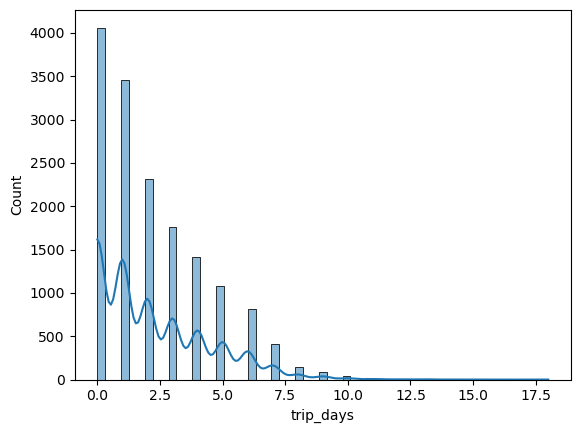

In [953]:
# Plot histogram
sns.histplot(data = df.trip_days, kde = True)

In [954]:
df['trip_days_by_hour'] = df['trip_hours'] /24

In [955]:
#### Approximate Avg trip duration
total_trips = df.settlement_id.count()
print("Avg trip time : ",(df['trip_hours'].sum()/total_trips)/24, "Days")

Avg trip time :  2.7838953111924254 Days


### ROUTE ANALYSIS

In [956]:
#### Common routes and destinations --

### FUEL CONSUMPTION

In [957]:
#Fuel COnsumption per trip in percentage 
df['fuel_exp_prctg'] = (df.fuel_exp / df.income )*100

##### RED FLAG : Trips with 0 Load KM and Zero Income showing fuel_exp_prctg as INFINITY

In [958]:
### Red Flag Last entry in this Load KM 75, EMPTY KM 75, INCOME 0
df.sort_values(by = 'fuel_exp_prctg',ascending = False).head(50)

sr. no.    month    settlement_id  vehicle_no ownership  \
16015     2008  10-2023     PU2324FTS446  NL01AH1774     Owned   
12117     1666   8-2023    HSR2324FTS412  NL01AG4717     Owned   
12107     1656   8-2023  CARTE2324FTS535  NL01AF8440     Owned   
12108     1657   8-2023     ZB2324FTS238  PB11CF5229     Owned   
12109     1658   8-2023     ZB2324FTS241  PB11CF5246     Owned   
12110     1659   8-2023     ZB2324FTS239  NL01AF5630     Owned   
12111     1660   8-2023     ZB2324FTS240  NL01AG3954     Owned   
12112     1661   8-2023     ZB2324FTS252  PB11CF5229     Owned   
12113     1662   8-2023     ZB2324FTS257  NL01AG3954     Owned   
12116     1665   8-2023     HR2324FTS365  NL01AG5615     Owned   
12118     1667   8-2023     ZB2324FTS280  NL01AE8915     Owned   
4630      1574   3-2023    EKA2223FTS254   NL01N4751     Owned   
12119     1668   8-2023     ZB2324FTS281  HR55AH8822     Owned   
12120     1669   8-2023    GM2324FTS1135  PB65AD8143     Owned   
12121     1670   8-2023     ZB2324FTS275  NL01AF7770     Owned   
12122     1671   8-2023     ZB2324FTS282  NL01AG3419     Owned   
12123     1672   8-2023     PU2324FTS223   NL01Q1244     Owned   
12124     1673   8-2023  CARTE2324FTS571  NL01AG3427     Owned   
12125     1674   8-2023     ZB2324FTS292  HR55AE5874     Owned   
12126     1675   8-2023     ZB2324FTS293  HR55AH8822     Owned   
12106     1655   8-2023     BN2324FTS178  HR55AD4862     Owned   
12105     1654   8-2023    HSR2324FTS381  NL01AG3451     Owned   
4610      1554   3-2023    GM2223FTS2598  NL01AG5647     Owned   
4611      1555   3-2023   PUFG2223FTS463  NL01AG3426     Owned   
4628      1572   3-2023    NS2223FTS1204  HR55AE3742     Owned   
4627      1571   3-2023      GM2324FTS11  NL01AG5790     Owned   
4626      1570   3-2023   PUFG2223FTS489  NL01AG5647     Owned   
4625      1569   3-2023     ZB2223FTS725  NL01AF5630     Owned   
4624      1568   3-2023     HR2223FTS849  NL01AF7767     Owned   
4623      1567   3-2023  CARTE2223FTS900  NL01AF8439     Owned   
4622      1566   3-2023  CARTE2223FTS902  NL01AG2779     Owned   
4621      1565   3-2023    GM2223FTS2713  NL01AG5788     Owned   
4620      1564   3-2023  CARTE2223FTS849  NL01AF8439     Owned   
4619      1563   3-2023     RD2223FTS857  PB11CB7806     Owned   
4618      1562   3-2023  CARTE2223FTS897  NL01AG3427     Owned   
4617      1561   3-2023  CARTE2223FTS888  NL01AF9397     Owned   
4616      1560   3-2023  CARTE2223FTS861  NL01AF7768     Owned   
4615      1559   3-2023  CARTE2223FTS818  NL01AF8440     Owned   
4614      1558   3-2023  CARTE2223FTS811  NL01AF9396     Owned   
4613      1557   3-2023    NS2223FTS1124  PB11CB7809     Owned   
4612      1556   3-2023     HR2223FTS796  NL01AG3419     Owned   
12127     1676   8-2023     NO2324FTS142  PB65AD6988     Owned   
12128     1677   8-2023     ZB2324FTS310  NL01AF8440     Owned   
12129     1678   8-2023     ZB2324FTS322  NL01AF6291     Owned   
3026      1586   2-2023    NS2223FTS1079  HR55AH2334     Owned   
3024      1584   2-2023   PUFG2223FTS444   NL01Q0465     Owned   
3023      1583   2-2023    NS2223FTS1081  HR55AH3896     Owned   
3022      1582   2-2023     NO2223FTS211  NL01AG3426     Owned   
3021      1581   2-2023    GM2223FTS2493  NL01AG3451     Owned   
3020      1580   2-2023  CARTE2223FTS774  NL01AF7763     Owned   

                  brand body_type  year       branch  \
16015   TATA Motors Ltd      TR08     0   Ranjangaon   
12117   TATA Motors Ltd      TR08  2012      Chennai   
12107  Ashok Leyand Ltd       TOT  2012   Carterpuri   
12108   TATA Motors Ltd      TR08  2017   Zaheerabad   
12109   TATA Motors Ltd      TR08  2017   Zaheerabad   
12110   TATA Motors Ltd      TR08  2022   Zaheerabad   
12111   TATA Motors Ltd      TR08  2022   Zaheerabad   
12112   TATA Motors Ltd      TR08  2017   Zaheerabad   
12113   TATA Motors Ltd      TR08  2022   Zaheerabad   
12116   TATA Motors Ltd      TR08  2013   Carterpuri   
12118            Eicher 

In [959]:
### Indentify those cases where LOAD KM is > 0 EMPTY KM > 0 but Income is ZERO

df[(df.load_km > 0) & (df.empty_km > 0) & (df.income == 0)]

sr. no.   month    settlement_id  vehicle_no ownership  \
1281      1282  1-2023    SN2223FTS3345  NL01AF7766     Owned   
1766       326  2-2023    GM2223FTS2285  HR55AH5264     Owned   
2220       780  2-2023    GM2223FTS2391   NL01Q0467     Owned   
7838       326  6-2023  CARTE2324FTS315  PB11CB7809     Owned   
12908      745  9-2023     PU2324FTS317  NL01AG3953     Owned   

                 brand body_type  year      branch  \
1281   TATA Motors Ltd      TR08  2012      Sanand   
1766          Mahindra      TR08  2019     Manesar   
2220   TATA Motors Ltd      TR08  2016  Carterpuri   
7838   TATA Motors Ltd      TR08  2017  Ranjangaon   
12908  TATA Motors Ltd      TR08  2022      Nagpur   

                                         customer  \
1281   Apl Logistics  Vascor Automotive Pvt. Ltd.   
1766                                          NaN   
2220                                          NaN   
7838                Fca India Automobiles Pvt Ltd   
12908         Mahindra Logistics Limited-(yuvraj)   

                                          driver  \
1281   Niyaz Ansari S/o Samsuddin Ansari (d2073)   
1766     Dinesh Chandra S/o Bhoop Narayan(d1345)   
2220       Shivam Ojha S/o Virendra Ojha (d2006)   
7838              Rohit S/o Harish Chand (d2024)   
12908   Sakindar Kumar S/o Vishnudev Ray (d2161)   

                                                   route  \
1281   Sanand - Kiran Motors Ltd-surat Via Ahmedabad,...   
1766   Gurgaon Railway Station - Aligarh Via Sohna, P...   
2220                         Manesar - Delhi Via Gurgaon   
7838   Ranjangaon - Jaipur Via Dhule, Nayagaon, Bhilw...   
12908  Nagpur - Dharwad Via Wardha, Nanded, Solapur, ...   

                          from from_zone                      to to_zone  \
1281                    SANAND      West  KIRAN MOTORS LTD-SURAT    West   
1766   GURGAON RAILWAY STATION     North                 ALIGARH   North   
2220                   MANESAR     North                   DELHI   North   
7838                RANJANGAON      West                  JAIPUR   North   
12908                   NAGPUR      West                 DHARWAD   South   

               start_date            end_date  load_km  empty_km  income  \
1281  2023-01-27 21:00:00 2023-01-28 15:00:00      300       300       0   
1766  2023-02-03 17:00:00 2023-02-04 12:02:06      145       182       0   
2220  2023-02-11 14:30:00 2023-02-13 10:28:59       75        75       0   
7838  2023-06-04 14:00:00 2023-06-08 23:55:00     1560        70       0   
12908 2023-09-11 20:00:00 2023-09-18 16:25:00     1065       495       0   

       vehicle_freight  hire_charges  fuel_exp  cash_exp  fasttag  \
1281                 0             0     18472      1650     3998   
1766                 0             0      8165      1000      700   
2220                 0             0      4307      4239      935   
7838                 0             0     49709     13454    12978   
12908                0             0     41994      8187     9345   

       driver_salary  fooding  maintenance  tyre  battery  document  month_sd  \
1281               0        0            0     0        0         0       1.0   
1766               0        0            0     0        0         0       2.0   
2220               0        0            0     0        0         0       2.0   
7838               0        0            0     0        0         0       6.0   
12908              0        0            0     0        0         0       9.0   

       month_ed  vehicle_running_expense  driver_expense  vehicle_maintenance  \
1281        1.0                    24120               0                    0   
1766        2.0                     9865               0                    0   
2220        2.0                     9481               0                    0   
7838        6.0                    76141               0                    0   
12908       9.0                    59526               0                    0

#### Month wise fuel consumption

In [960]:
df2 = df.groupby('month_sd').agg({'fuel_exp': sum, 'income' : sum}).reset_index().sort_values(by = 'fuel_exp', ascending = False)
df2

month_sd  fuel_exp     income
8        9.0  58576868  135215646
9       10.0  56991379  131161900
7        8.0  49926860  111095603
2        3.0  48099545  106334537
6        7.0  46606063  104683966
5        6.0  43550234   96479668
1        2.0  42916897   95863750
4        5.0  42222552   93706533
3        4.0  41712767   92151309
0        1.0  39395265   88872751
10      12.0   5165979   11137066

In [961]:
df2['fuel_income_ratio'] =df2['fuel_exp'] / df2['income'] 
df2

month_sd  fuel_exp     income  fuel_income_ratio
8        9.0  58576868  135215646           0.433211
9       10.0  56991379  131161900           0.434512
7        8.0  49926860  111095603           0.449404
2        3.0  48099545  106334537           0.452342
6        7.0  46606063  104683966           0.445207
5        6.0  43550234   96479668           0.451393
1        2.0  42916897   95863750           0.447686
4        5.0  42222552   93706533           0.450583
3        4.0  41712767   92151309           0.452655
0        1.0  39395265   88872751           0.443277
10      12.0   5165979   11137066           0.463855

#### avg Fuel vs Income percentage 

In [962]:
#### avg Fuel vs Income ratio 
print('fuel exp is ',int(round(df2.fuel_income_ratio.mean(),2)*100),"%", 'of income')

fuel exp is  45 % of income


#### cases where fuel_expense_percentage is infinite (That means Income is Zero but there are fuel expenses for the trip)

In [963]:
df[(df.fuel_exp_prctg > 100) & (df.income == 0)]["settlement_id"].count()

216

In [964]:
df[(df.fuel_exp_prctg > 100) & (df.income == 0)]

sr. no.    month    settlement_id  vehicle_no ownership  \
1281      1282   1-2023    SN2223FTS3345  NL01AF7766     Owned   
1403      1404   1-2023     NO2223FTS180   NL01N4975     Owned   
1404      1405   1-2023     HR2223FTS627  NL01AE9922     Owned   
1405      1406   1-2023     RD2223FTS676  NL01AF2232     Owned   
1406      1407   1-2023     BN2223FTS210  HR55AD6041     Owned   
1407      1408   1-2023    GM2223FTS2059  HR55AE9866     Owned   
1408      1409   1-2023  CARTE2223FTS641  NL01AF7768     Owned   
1409      1410   1-2023     ZB2223FTS625  HR55AD7042     Owned   
1410      1411   1-2023    HSR2223FTS887    KA425680     Owned   
1411      1412   1-2023  CARTE2223FTS683  NL01AF8439     Owned   
1412      1413   1-2023     NO2223FTS190  NL01AF7764     Owned   
1413      1414   1-2023     NO2223FTS189  NL01AG4058     Owned   
1414      1415   1-2023    HSR2223FTS903  NL01AF5406     Owned   
1415      1416   1-2023     NS2223FTS961   NL01Q7639     Owned   
1416      1417   1-2023     NO2223FTS194  NL01AE7831     Owned   
1418      1419   1-2023    HSR2223FTS963  NL01AE7836     Owned   
1419      1420   1-2023    HSR2223FTS971  NL01AG3451     Owned   
1766       326   2-2023    GM2223FTS2285  HR55AH5264     Owned   
2220       780   2-2023    GM2223FTS2391   NL01Q0467     Owned   
3011      1571   2-2023  CARTE2223FTS690  NL01AG4716     Owned   
3012      1572   2-2023  CARTE2223FTS701  NL01AF9395     Owned   
3014      1574   2-2023  CARTE2223FTS688  NL01AG3675     Owned   
3015      1575   2-2023    NS2223FTS1043  NL01AG4943     Owned   
3016      1576   2-2023    EKA2223FTS193  NL01AG1109     Owned   
3017      1577   2-2023  CARTE2223FTS732  HR55AE5398     Owned   
3018      1578   2-2023     ZB2223FTS670  NL01AA8908     Owned   
3019      1579   2-2023  CARTE2223FTS749  NL01AF7768     Owned   
3020      1580   2-2023  CARTE2223FTS774  NL01AF7763     Owned   
3021      1581   2-2023    GM2223FTS2493  NL01AG3451     Owned   
3022      1582   2-2023     NO2223FTS211  NL01AG3426     Owned   
3023      1583   2-2023    NS2223FTS1081  HR55AH3896     Owned   
3024      1584   2-2023   PUFG2223FTS444   NL01Q0465     Owned   
3025      1585   2-2023   PUFG2223FTS445  NL01AF5631     Owned   
3026      1586   2-2023    NS2223FTS1079  HR55AH2334     Owned   
3027      1587   2-2023  CARTE2223FTS747  NL01AG3452     Owned   
3028      1588   2-2023  CARTE2223FTS762  NL01AG3674     Owned   
3030      1590   2-2023  CARTE2223FTS753  HR55AE6168     Owned   
3031      1591   2-2023     NO2223FTS212   NL01N4753     Owned   
3032      1592   2-2023  CARTE2223FTS770  NL01AF9395     Owned   
3033      1593   2-2023  CARTE2223FTS763  NL01AG3677     Owned   
3034      1594   2-2023  CARTE2223FTS764  NL01AF9980     Owned   
4609      1553   3-2023    GM2223FTS2607  PB11CB7796     Owned   
4610      1554   3-2023    GM2223FTS2598  NL01AG5647     Owned   
4611      1555   3-2023   PUFG2223FTS463  NL01AG3426     Owned   
4612      1556   3-2023     HR2223FTS796  NL01AG3419     Owned   
4613      1557   3-2023    NS2223FTS1124  PB11CB7809     Owned   
4614      1558   3-2023  CARTE2223FTS811  NL01AF9396     Owned   
4615      1559   3-2023  CARTE2223FTS818  NL01AF8440     Owned   
4616      1560   3-2023  CARTE2223FTS861  NL01AF7768     Owned   
4617      1561   3-2023  CARTE2223FTS888  NL01AF9397     Owned   
4618      1562   3-2023  CARTE2223FTS897  NL01AG3427     Owned   
4619      1563   3-2023     RD2223FTS857  PB11CB7806     Owned   
4620      1564   3-2023  CARTE2223FTS849  NL01AF8439     Owned   
4621      1565   3-2023    GM2223FTS2713  NL01AG5788     Owned   
4622      1566   3-2023  CARTE2223FTS902  NL01AG2779     Owned   
4623      1567   3-2023  CARTE2223FTS900  NL01AF8439     Owned   
4624      1568   3-2023     HR2223FTS849  NL01AF7767     Owned   
4625      1569   3-2023     ZB2223FTS725  NL01AF5630     Owned   
4626      1570   3-2023   PUFG2223FTS489  NL01AG5647     Owned   
4627      1571   3-2023      GM2324FTS11  NL01A

#### cases where fuel_expense_percentage is > 100 but not infinite 

In [965]:
df[(df.fuel_exp_prctg > 100) & (df.income != 0)]["settlement_id"].count()

218

In [966]:
df[(df.fuel_exp_prctg > 100) & (df.income != 0)]

sr. no.    month    settlement_id  vehicle_no ownership  \
139        140   1-2023    SN2223FTS3097  NL01AF8438     Owned   
142        143   1-2023     NS2223FTS920  HR55AE5196     Owned   
174        175   1-2023     NS2223FTS918  NL01AB5273     Owned   
830        831   1-2023     HR2223FTS656  NL01AG0986     Owned   
1061      1062   1-2023    GM2223FTS2189  NL01AG1108     Owned   
1332      1333   1-2023   PUFG2223FTS415  HR55AD6041     Owned   
1447         7   2-2023    GM2223FTS2252  HR55AJ9789     Owned   
1625       185   2-2023    GM2223FTS2276  NL01AG4860     Owned   
1762       322   2-2023    NS2223FTS1017  NL01AG0735     Owned   
1763       323   2-2023   PUFG2223FTS426   NL01N4542     Owned   
1764       324   2-2023     PU2223FTS641  PB11CF5246     Owned   
1823       383   2-2023    NS2223FTS1025  NL01AF8447     Owned   
1824       384   2-2023    NS2223FTS1024  HR55AH1930     Owned   
1903       463   2-2023    NS2223FTS1038  NL01AF7770     Owned   
1921       481   2-2023    GM2223FTS2388  NL01AF5406     Owned   
2174       734   2-2023     PU2223FTS660  NL01AG4718     Owned   
2376       936   2-2023   PUFG2223FTS439  MH12PQ4531     Owned   
2717      1277   2-2023  CARTE2223FTS744  NL01AF0167     Owned   
2745      1305   2-2023    EKA2223FTS213  NL01AG4719     Owned   
2997      1557   2-2023     BN2223FTS277  PB11CF5224     Owned   
3238       182   3-2023    NS2223FTS1112  NL01AF7761     Owned   
3304       248   3-2023     HR2223FTS788  NL01AF2041     Owned   
3348       292   3-2023    GM2223FTS2591  NL01AG4860     Owned   
3355       299   3-2023     PU2223FTS715  NL01AG4717     Owned   
3372       316   3-2023    GM2223FTS2630  NL01AF8821     Owned   
3391       335   3-2023     PU2223FTS721   NL01N4546     Owned   
3469       413   3-2023     PU2223FTS714  NL01AF9816     Owned   
3472       416   3-2023     PU2223FTS717  PB11CF5236     Owned   
3484       428   3-2023     PU2223FTS731  HR55AE9866     Owned   
3639       583   3-2023    EKA2223FTS229  NL01AB4170     Owned   
3977       921   3-2023     RD2223FTS856  PB11CF5243     Owned   
4239      1183   3-2023   PUFG2223FTS482   NL01N4548     Owned   
4267      1211   3-2023  CARTE2223FTS906  NL01AF8440     Owned   
4304      1248   3-2023       RD2324FTS1  NL01AF8447     Owned   
4365      1309   3-2023       GM2324FTS9  HR55AE5874     Owned   
4406      1350   3-2023      GM2324FTS32  HR55AH3493     Owned   
4507      1451   3-2023      CH2324FTS14  NL01AF0164     Owned   
4571      1515   3-2023    NS2223FTS1203  HR55AD7042     Owned   
4711        79   4-2023      GM2324FTS86  HR55AE1614     Owned   
4712        80   4-2023     GM2324FTS106   NL01Q7639     Owned   
4819       187   4-2023      CH2324FTS20  NL01AG1110     Owned   
4909       277   4-2023      NS2324FTS18  NL01AE7840     Owned   
4913       281   4-2023      NS2324FTS19  NL01AG4058     Owned   
4986       354   4-2023     GM2324FTS124  NL01AF0165     Owned   
5006       374   4-2023      ZB2324FTS18  NL01AG5648     Owned   
5007       375   4-2023     HSR2324FTS38  NL01AG3423     Owned   
5016       384   4-2023     RD2324FTS235  NL01AF8822     Owned   
5043       411   4-2023      GM2324FTS99   NL01N4978     Owned   
5158       526   4-2023      CH2324FTS64  NL01AF9814     Owned   
5171       539   4-2023     RD2324FTS244  NL01AG3954     Owned   
5181       549   4-2023     GM2324FTS111  PB11CF5236     Owned   
5192       560   4-2023      NP2324FTS19  NL01AG1108     Owned   
5207       575   4-2023     RD2324FTS271   NL01N4754     Owned   
5288       656   4-2023      NS2324FTS39   NL01N4542     Owned   
5314       682   4-2023      NP2324FTS21  NL01AF9816     Owned   
5353       721   4-2023     GM2324FTS194  NL01AG4860     Owned   
5583       951   4-2023      NO2324FTS28  HR55AH0427     Owned   
5646      1014   4-2023      NS2324FTS78  PB11CF5247     Owned   
5680      1048   4-2023     SN2324FTS154  PB11CF5228     Owned   
5681      1049   4-2023     SN2324FTS163  PB11C

#### Highlights Fuel Expense

#### Empty KM per trip where fuel expense ratio is more than 50 

In [967]:
df3 = df[(df.fuel_exp_prctg > 50) & (df.income != 0)].groupby('branch').agg(Empty_KM = ('empty_km', 'sum'), Trip_count = ('branch', 'count')).reset_index()
df3['Empty_KM_Per_Trip'] = df3["Empty_KM"]/df3['Trip_count']
df3.sort_values(by = "Empty_KM_Per_Trip")

branch  Empty_KM  Trip_count  Empty_KM_Per_Trip
14            Sanand    274124        1045         262.319617
7            Manesar    167901         555         302.524324
1         Carterpuri    157520         501         314.411178
10             Noida     44874         117         383.538462
8             Nagpur    101640         242         420.000000
15        Zaheerabad    153450         338         453.994083
3   Erramanchi-(Kia)     26895          59         455.847458
6              Hosur    199580         435         458.804598
5        Head Office      7925          17         466.176471
13        Ranjangaon     23895          48         497.812500
11         Pantnagar    212620         381         558.057743
2            Chennai    294195         521         564.673704
12              Pune     73611         130         566.238462
0          Bangalore     22945          40         573.625000
9              Nasik    152010         233         652.403433
4           Haridwar    365565         505         723.891089

In [968]:
#Avg Empty KM per trip for trips where fuel_income_percentage is > 50%
df3.Empty_KM_Per_Trip.mean()

478.3948825506015

In [969]:
##Avg Empty KM per trip overall 
df.empty_km.sum()/df.shape[0]

276.9911097099622

In [970]:
df4 = df[(df.fuel_exp_prctg < 50) & (df.income != 0)].groupby('branch').agg(Empty_KM = ('empty_km', 'sum'), Trip_count = ('branch', 'count')).reset_index()
df4['Empty_KM_Per_Trip'] = df3["Empty_KM"]/df3['Trip_count']
df4.sort_values(by = "Empty_KM_Per_Trip")

branch  Empty_KM  Trip_count  Empty_KM_Per_Trip
14            Sanand    243920        1522         262.319617
7            Manesar    284124        2171         302.524324
1         Carterpuri     45327         319         314.411178
10             Noida     13055         182         383.538462
8             Nagpur     75295         300         420.000000
15        Zaheerabad     81336         310         453.994083
3   Erramanchi-(Kia)     64770         373         455.847458
6              Hosur    180095         695         458.804598
5        Head Office       610           6         466.176471
13        Ranjangaon     72560         261         497.812500
11         Pantnagar    152220         532         558.057743
2            Chennai    143586        1466         564.673704
12              Pune    221700         558         566.238462
0          Bangalore    133330         449         573.625000
9              Nasik    253045         692         652.403433
4           Haridwar     91742         382         723.891089

In [971]:
#Avg Empty KM per trip for trips where fuel_income_percentage is > 50%
df4.Empty_KM_Per_Trip.mean()

478.3948825506015

#### Route Assosiated with high and low fuel_exp_prcntg


In [972]:
df.columns

Index(['sr. no.', 'month', 'settlement_id', 'vehicle_no', 'ownership', 'brand',
       'body_type', 'year', 'branch', 'customer', 'driver', 'route', 'from',
       'from_zone', 'to', 'to_zone', 'start_date', 'end_date', 'load_km',
       'empty_km', 'income', 'vehicle_freight', 'hire_charges', 'fuel_exp',
       'cash_exp', 'fasttag', 'driver_salary', 'fooding', 'maintenance',
       'tyre', 'battery', 'document', 'month_sd', 'month_ed',
       'vehicle_running_expense', 'driver_expense', 'vehicle_maintenance',
       'expense', 'trip_days', 'trip_hours', 'profit', 'total_distance',
       'route_new', 'trip_days_by_hour', 'fuel_exp_prctg'],
      dtype='object')

#### Routes assosicated with fuel_exp_percentage  > 50 

In [973]:
df[(df.fuel_exp_prctg > 50) & (df.income != 0)].groupby(['branch','route_new']).agg(Empty_KM
            = ('empty_km', 'sum'), Trip_count = ('branch', 'count')).reset_index().sort_values(by = 'Empty_KM', ascending = False )

branch                                          route_new  \
659              Nasik                                        NASIK-SATNA   
428              Hosur                                      HOSUR-CUTTACK   
204            Chennai                                     CHENNAI-COCHIN   
752          Pantnagar                                  PANTNAGAR-LUCKNOW   
260            Chennai                                 CHENNAI-VIJAYAWADA   
467              Hosur                                   HOSUR-VIJAYAWADA   
1027            Sanand                                       SANAND-SURAT   
232            Chennai                                    CHENNAI-MADURAI   
261            Chennai                             CHENNAI-VISHAKHAPATNAM   
336           Haridwar                                   HARIDWAR-DIMAPUR   
743          Pantnagar                               PANTNAGAR-JAMSHEDPUR   
426              Hosur                                       HOSUR-COCHIN   
346           Haridwar                                     HARIDWAR-JAMMU   
463              Hosur                                       HOSUR-TRICHY   
378           Haridwar                                    HARIDWAR-RANCHI   
626              Nasik                                          NASIK-GOA   
331           Haridwar                                HARIDWAR-DALTENGANJ   
494            Manesar                  GURGAON RAILWAY STATION-JALANDHAR   
376           Haridwar                                    HARIDWAR-PURNIA   
200            Chennai                                CHENNAI-BHUBANESWAR   
145         Carterpuri                                     MOHALI-DHARWAD   
564             Nagpur                                    NAGPUR-AMRAVATI   
332           Haridwar                                   HARIDWAR-DEOGHAR   
375           Haridwar                                     HARIDWAR-PATNA   
469              Hosur                               HOSUR-VISHAKHAPATNAM   
549            Manesar                                    MANESAR-LUCKNOW   
427              Hosur                                   HOSUR-COIMBATORE   
226            Chennai                                     CHENNAI-KOLLAM   
712          Pantnagar                              PANTNAGAR-BHUBANESWAR   
1015            Sanand                                      SANAND-RAJKOT   
741          Pantnagar                                   PANTNAGAR-INDORE   
974             Sanand                                    SANAND-JUNAGADH   
354           Haridwar                                   HARIDWAR-KOLKATA   
244            Chennai                                CHENNAI-RAJAHMUNDRY   
440              Hosur                                        HOSUR-HUBLI   
468              Hosur                                   HOSUR-VILUPPURAM   
638              Nasik                                       NASIK-JHANSI   
903             Sanand                                   BECHARAJI-SANAND   
544            Manesar                                  MANESAR-GORAKHPUR   
489            Manesar                     GURGAON RAILWAY STATION-AMBALA   
573             Nagpur                                     NAGPUR-DHARWAD   
205            Chennai                                 CHENNAI-COIMBATORE   
198            Chennai                                 CHENNAI-BHIMAVARAM   
462              Hosur                                  HOSUR-TIRUNELVELI   
312           Haridwar                                     HARIDWAR-ARRAH   
359           Haridwar                                   HARIDWAR-LUCKNOW   
718          Pantnagar                                  PANTNAGAR-CUTTACK   
677              Noida                                     NOIDA-GUWAHATI   
206            Chennai                                    CHENNAI-CUTTACK   
496            Manesar                    GURGAON RAILWAY STATION-KAITHAL   
971             Sanand                                    SANAND-JAMNAGAR   
1112        

### COST ANALYSIS
#### Total cost per trip

In [974]:
df.columns

Index(['sr. no.', 'month', 'settlement_id', 'vehicle_no', 'ownership', 'brand',
       'body_type', 'year', 'branch', 'customer', 'driver', 'route', 'from',
       'from_zone', 'to', 'to_zone', 'start_date', 'end_date', 'load_km',
       'empty_km', 'income', 'vehicle_freight', 'hire_charges', 'fuel_exp',
       'cash_exp', 'fasttag', 'driver_salary', 'fooding', 'maintenance',
       'tyre', 'battery', 'document', 'month_sd', 'month_ed',
       'vehicle_running_expense', 'driver_expense', 'vehicle_maintenance',
       'expense', 'trip_days', 'trip_hours', 'profit', 'total_distance',
       'route_new', 'trip_days_by_hour', 'fuel_exp_prctg'],
      dtype='object')

In [975]:
print("cost per KM is ",df['expense'].sum()/total_kms, "INR")

cost per KM is  48.03976556566559 INR


In [976]:
print("cost per Trip is ",df['expense'].sum()/df['settlement_id'].nunique(), "INR") 

cost per Trip is  50510.44446578324 INR


### REVENUE GENERATED FROM TRIPS

In [977]:
#Total revenue generated from trips
Total_Revenue = df['income'].sum()
print("Total revenue generated from Trips :",df['income'].sum())

Total revenue generated from Trips : 1066702729


#### Revenue generated by months

In [978]:
#Revenue generated by months
df.groupby('month_ed').agg(Revenue = ('income','sum'))

Revenue
month_ed           
1.0        86344822
2.0        95230337
3.0       100690445
4.0        96921814
5.0        93713001
6.0        94819770
7.0       105368484
8.0       108589255
9.0       130131703
10.0      154893098

#### Revenue per trip

In [979]:
# revenue generated per trips
print("Revenue per Trip :",df['income'].sum()/df['settlement_id'].nunique(), "INR")

Revenue per Trip : 68286.45598873311 INR


#### Ratio Revenue per trip Vs cost per trip

In [980]:
#Ratio Revenue per trip Vs cost per trip
Total = df['income'].sum()/df['settlement_id'].nunique() + df['expense'].sum()/df['settlement_id'].nunique()

print(round((df['income'].sum()/df['settlement_id'].nunique()/Total)*100) ,":",
round(df['expense'].sum()/df['settlement_id'].nunique()/Total,2)*100)

57 : 43.0


#### Breakdown

#### Fuel Expense Percentage

In [981]:
round((df.fuel_exp.sum() / Total_Revenue) * 100, 2)

44.55

#### Cash expense and fasttag expense prcentage 

In [982]:
round((df.fasttag.sum() / Total_Revenue) * 100, 2) + round((df.cash_exp.sum() / Total_Revenue) * 100, 2)

20.91

#### driver salary

In [983]:
round((df.driver_salary.sum() / Total_Revenue) * 100, 2) + round((df.fooding.sum() / Total_Revenue) * 100, 2)

3.4699999999999998

#### Maintenance Tyre Battery Documents

In [984]:
round((df.maintenance.sum() / Total_Revenue) +(df.tyre.sum() / Total_Revenue) + (df.battery.sum() / Total_Revenue) +
                (df.document.sum() / Total_Revenue),2)

0.05

#### Margin

In [985]:
print(round(100  - (44.55 + 20.91 + 3.46 + 0.05), 2), "%")

31.03 %


#### EFFICIENCY METRICS

#### Revenue per KM

In [986]:
print(" Revenue per KM is INR :",round(Total_Revenue/ df.total_distance.sum()))

 Revenue per KM is INR : 65


In [987]:
print(" Expense per KM is INR :",round(df.expense.sum()/ df.total_distance.sum()))

 Expense per KM is INR : 48


In [988]:
print(" Fuel expense KM is INR :",round(df.fuel_exp.sum()/ df.total_distance.sum()))

 Fuel expense KM is INR : 29


#### Revenue per truck -- Monthly revenue / trucks in fleet for that month

In [989]:
month_rev = 2
df[df.month_sd == month_rev].income.sum() / df[df.month_sd == month_rev].vehicle_no.nunique()

330564.6551724138

#### cost per truck -- Total transportation expense per month / trucks in fleet for that month

In [990]:
month_rev = 2
df[df.month_sd == month_rev].expense.sum() / df[df.month_sd == month_rev].vehicle_no.nunique()

243861.90344827587

#### Vehicle Utilization Rates

#####  the mileage capacity of a total fleet and comparing it to the actual mileage driven within a set time frame

In [991]:
import re

In [992]:
print(df['driver'].head(5))
                       

1          Vinod Kumar S/o Har Prasad (d1795)
2        Md Shahabuddin S/o Md N Khan (d1822)
4        Rais Ahmad S/o Noor Mohammad (d1978)
5           Lakhan Rana S/o Karu Rana (d2039)
6    Ram Gopal Tripathi S/o Tulsi Ram (d0234)
Name: driver, dtype: object


In [993]:

# Extracting ID and removing it from 'Driver' column
df['driver_id'] = df['driver'].str.extract(r'\(([dD]\d{3,4})\)')

df['driver_id'] = df['driver_id'].str.upper()

df['driver_id']

1        D1795
2        D1822
4        D1978
5        D2039
6        D0234
7         D838
8        D0556
10       D1944
11       D2028
12       D1989
14       D0450
15       D1943
16       D1311
17       D0183
18       D1219
19       D0733
20       D0030
21       D1199
22       D0474
23       D1380
24       D1148
25         NaN
26       D0118
27       D0914
28       D0461
29       D0595
30       D0414
31       D0464
32       D1973
33       D2078
34       D0789
35       D0373
36       D0160
37       D1984
38       D2068
39       D1911
40       D1329
41       D0827
42       D0139
43       D2108
44       D1934
45       D1773
46       D2041
47       D1917
48       D1507
49       D1584
50       D0154
51       D1304
52       D1408
53       D0268
54       D1181
55       D0557
56       D1828
57       D0276
58       D0173
59       D2085
60       D0957
61       D1863
62       D1826
63       D0104
64       D2045
65       D0383
66       D0240
67       D1861
68       D0015
69       D0162
70       D

#### RED FLAG 508 entries with incorrect format or not mentioned

In [994]:
df[df.driver_id.isna()].shape

(508, 46)

#### Enteries where driver ids are in incorrect format or not mentioned 

In [995]:
df[df.driver_id.isna()].head(40)

sr. no.   month  settlement_id  vehicle_no ownership            brand  \
25         26  1-2023   HR2223FTS631  HR55AJ8309     Owned         Mahindra   
86         87  1-2023  GM2223FTS2153  NL01AG3452     Owned  TATA Motors Ltd   
147       148  1-2023  CH2223FTS1558  NL01AF8443     Owned  TATA Motors Ltd   
172       173  1-2023  SN2223FTS3138  HR55AD4960     Owned  TATA Motors Ltd   
263       264  1-2023  CH2223FTS1567  NL01AF8443     Owned  TATA Motors Ltd   
275       276  1-2023   NO2223FTS182  HR55AJ8309     Owned         Mahindra   
300       301  1-2023  GM2223FTS2058  HR55AH7546     Owned         Mahindra   
338       339  1-2023  CH2223FTS1593  NL01AF8443     Owned  TATA Motors Ltd   
379       380  1-2023  GM2223FTS2149  HR55AD4960     Owned  TATA Motors Ltd   
400       401  1-2023   NO2223FTS191  HR55AJ8309     Owned         Mahindra   
488       489  1-2023   NP2223FTS519  HR55AH7546     Owned         Mahindra   
691       692  1-2023  HSR2223FTS899  NL01AF8443     Owned  TATA Motors Ltd   
729       730  1-2023   ZB2223FTS629  HR55AH7546     Owned         Mahindra   
883       884  1-2023  CH2223FTS1646  NL01AF8443     Owned  TATA Motors Ltd   
894       895  1-2023   PU2223FTS593  HR55AH7546     Owned         Mahindra   
927       928  1-2023   NP2223FTS539  HR55AJ8309     Owned         Mahindra   
958       959  1-2023  CH2223FTS1673  NL01AF8443     Owned  TATA Motors Ltd   
990       991  1-2023   NS2223FTS966  HR55AH7546     Owned         Mahindra   
1121     1122  1-2023  EKA2223FTS175  NL01AF8443     Owned  TATA Motors Ltd   
1129     1130  1-2023   HR2223FTS684  NL01AF2230     Owned  TATA Motors Ltd   
1134     1135  1-2023   HR2223FTS680  HR55AD4960     Owned  TATA Motors Ltd   
1196     1197  1-2023   BN2223FTS238  HR55AH7546     Owned         Mahindra   
1284     1285  1-2023   ZB2223FTS649  HR55AJ8309     Owned         Mahindra   
1285     1286  1-2023   HR2223FTS691  NL01AG4718     Owned  TATA Motors Ltd   
1335     1336  1-2023  GM2223FTS2239  HR55AD4960     Owned  TATA Motors Ltd   
1387     1388  1-2023  GM2223FTS2226  NL01AF2230     Owned  TATA Motors Ltd   
1420     1421  1-2023            NaN   HR55R5804     Owned  TATA Motors Ltd   
1421     1422  1-2023            NaN  NL01AG4716     Owned  TATA Motors Ltd   
1422     1423  1-2023            NaN  NL01AG4856     Owned  TATA Motors Ltd   
1423     1424  1-2023            NaN  NL01AG4857     Owned  TATA Motors Ltd   
1424     1425  1-2023            NaN  NL01AG4858     Owned  TATA Motors Ltd   
1425     1426  1-2023            NaN  NL01AG4859     Owned  TATA Motors Ltd   
1426     1427  1-2023            NaN  NL01AG4860     Owned  TATA Motors Ltd   
1427     1428  1-2023            NaN  NL01AG4861     Owned  TATA Motors Ltd   
1428     1429  1-2023            NaN   HR55R5804     Owned  TATA Motors Ltd   
1429     1430  1-2023            NaN  NL01AG3421     Owned  TATA Motors Ltd   
1430     1431  1-2023            NaN  NL01AG4856     Owned  TATA Motors Ltd   
1431     1432  1-2023            NaN  NL01AG4857     Owned  TATA Motors Ltd   
1432     1433  1-2023            NaN  NL01AG4859     Owned  TATA Motors Ltd   
1433     1434  1-2023            NaN   HR55R5799     Owned  TATA Motors Ltd   

     body_type  year            branch                               customer  \
25        TR08  2020        Ranjangaon          Fca India Automobiles Pvt Ltd   
86        TR08  2022           Chennai              Byd India Private Limited   
147       TR08  2012  Erramanchi-(Kia)         Glovis India Anantapur Pvt Ltd   
172       TR08  2018              Pune               Tata Motors Pv Ltd, Pune   
263       TR08  2012           Chennai              Byd India Private Limited   
275       TR08  2020          Haridwar             Mahindra Logistics Limited   
300       TR08  2020           Manesar               Maruti Suzuki India Ltd.   
338       TR08  2012           Chennai              Glovis India Private Ltd.   
379       TR08  2018            Sanan

#### Drivers average kms
##### Total distance covered by fleet / total drivers 

In [996]:
month_rev = 4
df['vehicle_no'] =  df['vehicle_no'].str.upper()

In [997]:
drivers_avg_kms = df[(df.driver_id.notna()) & (df.month_ed == month_rev)]['total_distance'].sum() / df[(df.driver_id.notna()) & (df.month_ed == month_rev)]['driver_id'].nunique()
drivers_avg_kms

4986.611295681063

#### Companies mileage capacity
##### A driver’s average kms * number of vehicles in the fleet

In [998]:
companies_mileage_capicity = (drivers_avg_kms )*(df[(df.driver_id.notna()) & (df.month_ed == month_rev)]['vehicle_no'].nunique())
companies_mileage_capicity

1446117.2757475083

In [999]:
df[(df.driver_id.notna()) & (df.month_ed == month_rev)]['total_distance'].sum()

1500970

In [1000]:
df[df.month_ed == month_rev]['total_distance'].sum() 

1531980

In [1001]:
df[df.month_ed == month_rev]['driver'].nunique()

308

#### Vehicle Utilization Rate

##### All miles driven by the fleet divided by the company’s mileage capacity


In [1002]:
df[(df.driver_id.notna()) & (df.month_ed == month_rev)]['total_distance'].sum() / companies_mileage_capicity - 0.3

0.7379310344827585

#### DRIVER PERFORMANCE

## Note : Further check regions and zones where drivers have good and bad performance 

In [1003]:
#Total distance covered by drivers
df[(df.driver_id.notna())].groupby("driver_id").agg(distance_covered = ('total_distance' , 'sum'),trip_count = ('driver_id', 'count')).reset_index().sort_values(by = "trip_count", ascending = False )

driver_id  distance_covered  trip_count
192     D1407             50730         174
301     D1993             28610         172
152     D0998             49452         165
319     D2030             22820         163
289     D1956             20870         137
148     D0975             44316         134
240     D1800             40627         131
155     D1039             41176         129
270     D1907             27085         126
94      D0539             42846         126
280     D1927             38761         120
17      D0052             36519         116
207     D1613             36378         106
397     D2140             18175         105
138     D0895             34346         100
355     D2088             25688          96
434     D2180             10620          89
217     D1702             23060          86
368     D2108             57490          76
266     D1892             69261          68
42      D0208             62051          67
388     D2129             11400          66
356     D2089             65370          65
71      D0394             67682          63
56      D0265             52330          60
309     D2012             27351          60
128     D0810             63844          58
438     D2185             18581          58
339     D2068             73682          58
334     D2061             62551          57
350     D2081             66556          57
111     D0672             37618          57
232     D1773             62367          56
51      D0240             50514          56
61      D0276             62225          55
143     D0924             64682          55
376     D2116             61912          54
325     D2045             68010          54
126     D0781             37890          53
169     D1219             59249          52
215     D1684             39671          52
144     D0934             49023          51
336     D2063             57596          51
34      D0172             48277          50
156     D1098             74929          50
147     D0957             53889          50
358     D2093             58003          49
23      D0082             50421          49
32      D0160             65602          49
18      D0073             47629          49
12      D0037             55179          48
314     D2021             57761          48
377     D2117             40866          48
267     D1899             41980          48
47      D0228             49161          48
204     D1535             47429          47
371     D2111             52550          47
286     D1943             37736          47
66      D0373             55440          47
335     D2062             60794          47
231     D1762             55629          46
315     D2022             41190          46
361     D2098             54174          46
341     D2071             53291          46
161     D1152             43024          46
387     D2127             46748          46
308     D2009             41535          45
255     D1850             50906          45
98      D0556             53837          45
261     D1872             58270          45
234     D1775             48391          45
190     D1390             61427          45
9       D0030             59619          45
11      D0035             60303          45
22      D0080             62909          45
366     D2106             60371          45
123     D0776             49030          44
14      D0040             58375          44
25      D0099             60926          44
282     D1934             60469          44
46      D0221             52772          44
222     D1714             51556          44
57      D0266             60615          44
80      D0461             58768          43
33      D0162             62917          43
225     D1727             53369          43
327     D2047             62984          43
60      D0274             61643          43
290     D1957             34765          43
333     D2060             59170          43


#### Driver efficiency

In [1004]:
#Total distance covered by drivers
df[(df.driver_id.notna())].groupby("driver_id").agg(distance_covered = ('total_distance' , 'sum'),trip_count = ('driver_id', 'count') ,
                                                 avg_fuel_exp_prctg = ('fuel_exp_prctg' , 'mean')  ).reset_index().sort_values(by = "avg_fuel_exp_prctg", ascending = False )

driver_id  distance_covered  trip_count  avg_fuel_exp_prctg
188     D1367              7339          11                 inf
465     D2213             14317           8                 inf
238     D1795             30672          26                 inf
269     D1901             26511          29                 inf
166     D1206             35817          32                 inf
391     D2132              3684           5                 inf
445     D2192              9967          34                 inf
208     D1629             25455          25                 inf
206     D1584             38520          31                 inf
480     D2233              8280           7                 inf
470     D2218                60           1                 inf
271     D1911             45078          35         1839.552307
437     D2184             15060          10          105.354843
137     D0889               925           1           76.061004
418     D2163              9205           6           65.611274
185     D1334             51056          36           62.230490
239     D1799             17925          16           60.515096
439     D2186              1430           1           60.417223
359     D2094             45847          35           59.474157
135     D0860             16799          14           59.234731
246     D1821             46975          31           59.220589
244     D1811             38718          29           58.384962
519     D2279               955           1           58.374771
96      D0544             54488          34           58.331761
331     D2055              1630           1           58.241321
402     D2145             16462          14           57.820562
447     D2194             13091          16           57.570518
448     D2195             19680          15           56.869487
77      D0449             46179          31           56.463122
419     D2164             25700          22           56.346166
194     D1410              3335           2           55.733893
69      D0383             29097          18           55.646800
164     D1190             34670          26           55.305693
146     D0949              7030           5           54.814995
316     D2023             13610          13           54.622724
370     D2110             53528          31           54.585063
209     D1639             50925          40           54.342507
311     D2014             50242          42           54.325729
339     D2068             73682          58           54.285320
31      D0157             57865          37           54.159468
310     D2013             49542          31           54.040914
463     D2211               672           1           53.764368
190     D1390             61427          45           53.761197
398     D2141             36869          24           53.714639
61      D0276             62225          55           53.562836
216     D1701             54834          42           53.522399
325     D2045             68010          54           53.361032
228     D1747             35215          30           53.185767
218     D1706             16435           9           53.043329
82      D0466             18460          15           52.894572
78      D0450             37205          37           52.868468
171     D1238             37929          41           52.762589
259     D1861              2560           1           52.557297
409     D2153              1905           2           52.360788
172     D1260             29048          29           52.242984
364     D2104              3745           3           52.203286
104     D0585             40412          23           52.164873
87      D0497              5090           4           52.009816
268     D1900             12421          10           51.994275
438     D2185             18581          58           51.952473
386     D2126             29695          27           51.933118
175     D1268             43415     

#### IDLE VEHICLE

In [1005]:
month_rev = 10

In [1006]:
# Trip Start and End Month is same , calculated sum of Trip days for each vehicle



month_rev  # =  for month
df_id = df[(df.month_ed == month_rev) & (df.month_sd == month_rev) ].groupby('vehicle_no').agg({'trip_days' : 'sum'}).reset_index()
df_id['idle_time'] = round(((30 - df_id.trip_days)/30)*100)
df_id.sort_values(by = 'idle_time')

vehicle_no  trip_days  idle_time
17   HR55AE5398       22.0       27.0
289   NL01N4546       22.0       27.0
201  NL01AF9818       21.0       30.0
101  NL01AC0003       21.0       30.0
212  NL01AG1108       21.0       30.0
369  UP32KN7118       20.0       33.0
340  PB11CF5231       20.0       33.0
10   HR55AE1556       20.0       33.0
43   HR55AH7474       19.0       37.0
228  NL01AG3450       19.0       37.0
2    HR55AD4067       19.0       37.0
81   NL01AA8907       19.0       37.0
69   NL01AA5957       18.0       40.0
352  PB11CF5247       18.0       40.0
35   HR55AH3493       18.0       40.0
337  PB11CF5228       18.0       40.0
366  PB65AD7042       18.0       40.0
59   NL01AA3309       18.0       40.0
200  NL01AF9817       18.0       40.0
28   HR55AH0427       18.0       40.0
136  NL01AE8915       18.0       40.0
278   NL01N2608       18.0       40.0
5    HR55AD5848       18.0       40.0
258  NL01AG5789       17.0       43.0
108  NL01AC1019       17.0       43.0
33   HR55AH3012       17.0       43.0
115  NL01AC2753       17.0       43.0
371  UP32KN7121       17.0       43.0
15   HR55AE5068       17.0       43.0
345  PB11CF5239       17.0       43.0
6    HR55AD6041       17.0       43.0
11   HR55AE1614       17.0       43.0
326  PB11CB7801       16.0       47.0
199  NL01AF9816       16.0       47.0
187  NL01AF8445       16.0       47.0
295   NL01N4755       16.0       47.0
303   NL01N4978       16.0       47.0
313   NL01Q1244       16.0       47.0
175  NL01AF7768       16.0       47.0
324  PB11CB7794       16.0       47.0
192  NL01AF8822       16.0       47.0
269  NL01AH1390       16.0       47.0
62   NL01AA5950       16.0       47.0
356  PB65AD6988       16.0       47.0
30   HR55AH2285       16.0       47.0
82   NL01AA8908       16.0       47.0
247  NL01AG4860       16.0       47.0
210  NL01AG1106       15.0       50.0
84   NL01AB4168       15.0       50.0
235  NL01AG3677       15.0       50.0
3    HR55AD4862       15.0       50.0
142  NL01AF0163       15.0       50.0
281   NL01N3584       15.0       50.0
88   NL01AB4908       15.0       50.0
95   NL01AB4915       15.0       50.0
9    HR55AE0996       15.0       50.0
365  PB65AD7039       15.0       50.0
92   NL01AB4912       15.0       50.0
254  NL01AG5646       15.0       50.0
8    HR55AD7042       15.0       50.0
262  NL01AG6340       15.0       50.0
163  NL01AF5630       15.0       50.0
290   NL01N4547       15.0       50.0
121  NL01AD9825       15.0       50.0
343  PB11CF5236       15.0       50.0
32   HR55AH2486       15.0       50.0
351  PB11CF5246       15.0       50.0
154  NL01AF2232       15.0       50.0
36   HR55AH3896       15.0       50.0
112  NL01AC1023       15.0       50.0
150  NL01AF2228       15.0       50.0
335  PB11CF5226       15.0       50.0
286   NL01N4541       15.0       50.0
238  NL01AG3954       15.0       50.0
243  NL01AG4856       15.0       50.0
47   HR55AJ3502       15.0       50.0
302   NL01N4976       15.0       50.0
19   HR55AE6168       15.0       50.0
93   NL01AB4913       14.0       53.0
105  NL01AC1016       14.0       53.0
104  NL01AC1015       14.0       53.0
102  NL01AC0004       14.0       53.0
164  NL01AF5631       14.0       53.0
138  NL01AE8917       14.0       53.0
114  NL01AC2752       14.0       53.0
146  NL01AF0167       14.0       53.0
109  NL01AC1020       14.0       53.0
284   NL01N3587       14.0       53.0
80   NL01AA8906       14.0       53.0
37   HR55AH3993       14.0       53.0
348  PB11CF5243       14.0       53.0
328  PB11CB7805       14.0       53.0
21   HR55AE6377       14.0       53.0
314   NL01Q3944       14.0       53.0
312   NL01Q1243       14.0       53.0
310   NL01Q0466       14.0       53.0
18   HR55AE5874       14.0       53.0
309   NL01Q0465       14.0       53.0
34   HR55AH3221       14.0       53.0
297   NL01N4762       14.0       53.0
64   NL01AA5952       14.0       53.0
282   NL01N3585       14.0       53.0
13   HR55AE3590       14.0       53.0
70   NL01AA5958       14.0       53.0
273   NL01N2601

In [1007]:
##### IDLE vehicle branch wise 

In [1008]:
month_rev  # =  for month
df_id = df[(df.month_ed == month_rev) & (df.month_sd == month_rev) ].groupby('branch').agg({'trip_days' : 'sum'}).reset_index()
df_id['idle_time'] = round(((30 - df_id.trip_days)/30)*100)
df_id.sort_values(by = 'idle_time')

branch  trip_days  idle_time
7            Manesar      806.0    -2587.0
14            Sanand      413.0    -1277.0
2            Chennai      392.0    -1207.0
1         Carterpuri      325.0     -983.0
9              Nasik      272.0     -807.0
11         Pantnagar      264.0     -780.0
12              Pune      248.0     -727.0
0          Bangalore      245.0     -717.0
6              Hosur      238.0     -693.0
4           Haridwar      215.0     -617.0
15        Zaheerabad      209.0     -597.0
8             Nagpur      148.0     -393.0
3   Erramanchi-(Kia)      141.0     -370.0
10             Noida      131.0     -337.0
13        Ranjangaon       99.0     -230.0
5        Head Office        3.0       90.0

In [1009]:
df.columns

Index(['sr. no.', 'month', 'settlement_id', 'vehicle_no', 'ownership', 'brand',
       'body_type', 'year', 'branch', 'customer', 'driver', 'route', 'from',
       'from_zone', 'to', 'to_zone', 'start_date', 'end_date', 'load_km',
       'empty_km', 'income', 'vehicle_freight', 'hire_charges', 'fuel_exp',
       'cash_exp', 'fasttag', 'driver_salary', 'fooding', 'maintenance',
       'tyre', 'battery', 'document', 'month_sd', 'month_ed',
       'vehicle_running_expense', 'driver_expense', 'vehicle_maintenance',
       'expense', 'trip_days', 'trip_hours', 'profit', 'total_distance',
       'route_new', 'trip_days_by_hour', 'fuel_exp_prctg', 'driver_id'],
      dtype='object')

#### Geographical Analysis

In [1010]:
df_geo_Analysis = df.groupby("from_zone").agg(Revenue = ('income','sum'), Profit = ('profit','sum')).reset_index()
df_geo_Analysis

from_zone    Revenue     Profit
0      East    4381098   -6739838
1     North  386015534  102414648
2     South  343909194   89508351
3      West  332396903   94857447

In [1011]:
Total_Revenue_GA = df_geo_Analysis.Revenue.sum()
Total_Revenue_GA

1066702729

In [1012]:
Total_profit_GA = df_geo_Analysis.Profit.sum()
Total_profit_GA

280040608

In [1013]:
df_geo_Analysis["Revenue_prctg"] = round((df_geo_Analysis["Revenue"] / Total_Revenue_GA) * 100, 2)
df_geo_Analysis

from_zone    Revenue     Profit  Revenue_prctg
0      East    4381098   -6739838           0.41
1     North  386015534  102414648          36.19
2     South  343909194   89508351          32.24
3      West  332396903   94857447          31.16

#### Zone wise Revenue & Profit 

In [1014]:
df_geo_Analysis["Profit_prctg"] = round((df_geo_Analysis["Profit"] / Total_profit_GA) * 100, 2)
df_geo_Analysis

from_zone    Revenue     Profit  Revenue_prctg  Profit_prctg
0      East    4381098   -6739838           0.41         -2.41
1     North  386015534  102414648          36.19         36.57
2     South  343909194   89508351          32.24         31.96
3      West  332396903   94857447          31.16         33.87

In [1015]:
branch_analysis = df.groupby("branch").agg(Revenue = ('income','sum'), Profit = ('profit','sum')).reset_index()
Revenue_branch = branch_analysis.Revenue.sum()
Profit_branch = branch_analysis.Profit.sum()
branch_analysis['Revenue_prctg'] = round((branch_analysis['Revenue'] / Revenue_branch) * 100,2)
branch_analysis['Prft_prctg'] = round((branch_analysis['Profit'] / Profit_branch) * 100,2)
branch_analysis.sort_values(by = 'Prft_prctg', ascending  = False)

branch    Revenue    Profit  Revenue_prctg  Prft_prctg
7            Manesar  168344289  60263287          15.78       21.52
14            Sanand  122931113  34306044          11.52       12.25
2            Chennai  115748393  26451777          10.85        9.45
9              Nasik   81269640  25063123           7.62        8.95
6              Hosur   84008922  24433012           7.88        8.72
12              Pune   68234561  21624255           6.40        7.72
11         Pantnagar   90359225  20574127           8.47        7.35
0          Bangalore   49520760  16192252           4.64        5.78
4           Haridwar   61763456  11931546           5.79        4.26
3   Erramanchi-(Kia)   35281446   9995346           3.31        3.57
15        Zaheerabad   48590086   9621021           4.56        3.44
13        Ranjangaon   28299822   8503057           2.65        3.04
8             Nagpur   29822737   4884678           2.80        1.74
10             Noida   20053752   3741589           1.88        1.34
1         Carterpuri   61039087   2462086           5.72        0.88
5        Head Office    1435440     -6592           0.13       -0.00

#### CUSTOMER CLUSTERING

In [1016]:
df.columns

Index(['sr. no.', 'month', 'settlement_id', 'vehicle_no', 'ownership', 'brand',
       'body_type', 'year', 'branch', 'customer', 'driver', 'route', 'from',
       'from_zone', 'to', 'to_zone', 'start_date', 'end_date', 'load_km',
       'empty_km', 'income', 'vehicle_freight', 'hire_charges', 'fuel_exp',
       'cash_exp', 'fasttag', 'driver_salary', 'fooding', 'maintenance',
       'tyre', 'battery', 'document', 'month_sd', 'month_ed',
       'vehicle_running_expense', 'driver_expense', 'vehicle_maintenance',
       'expense', 'trip_days', 'trip_hours', 'profit', 'total_distance',
       'route_new', 'trip_days_by_hour', 'fuel_exp_prctg', 'driver_id'],
      dtype='object')

#### Number of customers

In [1017]:
df['customer'].nunique()

133

In [1018]:
df.columns

Index(['sr. no.', 'month', 'settlement_id', 'vehicle_no', 'ownership', 'brand',
       'body_type', 'year', 'branch', 'customer', 'driver', 'route', 'from',
       'from_zone', 'to', 'to_zone', 'start_date', 'end_date', 'load_km',
       'empty_km', 'income', 'vehicle_freight', 'hire_charges', 'fuel_exp',
       'cash_exp', 'fasttag', 'driver_salary', 'fooding', 'maintenance',
       'tyre', 'battery', 'document', 'month_sd', 'month_ed',
       'vehicle_running_expense', 'driver_expense', 'vehicle_maintenance',
       'expense', 'trip_days', 'trip_hours', 'profit', 'total_distance',
       'route_new', 'trip_days_by_hour', 'fuel_exp_prctg', 'driver_id'],
      dtype='object')

In [1019]:
customer_df = df.groupby('customer').agg({'route_new':'count',"income": "sum", 'profit': 'sum'}).reset_index().sort_values(by = 'income', ascending  = False)
total = customer_df.income.sum()
total_prft = customer_df.profit.sum()
customer_df['prcnt_income'] = (customer_df['income']/total)*100
customer_df['prcnt_profit'] = (customer_df['profit']/total_prft)*100
customer_df

customer  route_new     income  \
54                          Mahindra Logistics Limited       2723  232672135   
70                            Maruti Suzuki India Ltd.       1310  129257883   
35                           Glovis India Private Ltd.       1728   86786493   
9                              Ashok Leyland Ltd Hosur       1086   76961276   
119                         Tata Motors Ltd, Pantnagar        714   76709760   
120                      Tata Motors Pv Ltd, Ahmedabad        665   45866910   
82                  Oriental Carriers Private Limited.       1484   39529206   
34                      Glovis India Anantapur Pvt Ltd        432   35171212   
5           Apl Logistics  Vascor Automotive Pvt. Ltd.       1362   30503014   
60                 Mahindra Logistics Limited-(yuvraj)        452   30212703   
10                                  Ashok Leyland Ltd.        235   28917653   
55                Mahindra Logistics Limited -(swaraj)        378   26985551   
69                 Maruti Suzuki India Ltd - Karnataka        225   25312502   
122  Tata Passenger Electric Mobility Limited - Gujrat        328   24347357   
121                           Tata Motors Pv Ltd, Pune        284   22818532   
22                          Cnh Industrial (i) Pvt Ltd        272   20380117   
14                           Byd India Private Limited        177   19867669   
30                       Fca India Automobiles Pvt Ltd        201   18716538   
127  Transystem Logistics International Private Lim...        185   18693079   
73                      Mg Motor India Private Limited        371   18185247   
85               Pca Automobiles India Private Limited         45    5119872   
6                                      Arhan Logistics         63    5065482   
68                Maruti Suzuki India Limited - Gujrat         60    4598739   
50   Kubota Agricultural Machinery India Private Li...         35    3003000   
91                     R. Sai Logistics India Pvt Ltd.         46    2599248   
116                      Standard Castings Pvt Limited         21    2550000   
65                Mahindra Logistics Limited-tamilnadu         18    2105278   
62           Mahindra Logistics Limited-swaraj ,gujrat         15    1983416   
117                     Switch Mobility Automotive Ltd         26    1813900   
84                Pca Automobile India Private Limited         20    1795972   
97               Riddhi Siddhi Transport And Logistics         79    1766300   
4                                     Anurag Roadlines         45    1238093   
95                         Reliance Industries Limited         13    1170000   
112                                Sintex-bapl Limited         44    1167100   
72                  Mehrab Logistics And Aviation Ltd.         20    1139115   
118                         Tata Motors Ltd, Ahmedabad          8    1093389   
52                             Life Automobile Pvt Ltd          7    1090976   
108                        Sharma Car Transport Co.ggn         11    1064983   
105                           Sandhu Roadlines Pvt Ltd         19    1031500   
83                       Osl Logistics Private Limited         15     992363   
90                                       Ptl Own Fleet         10     703613   
99                                    S.d.h. Logistics         12     698993   
44    Joshi Konoike Transport & Infrastructure Pvt Ltd         30     633194   
38                       Icm Logistics Private Limited         12     618685   
40                            Jainex Pariwahan Pvt Ltd          6     544899   
96                Reliance Industries Limited - Gujrat          4     497572   
16                           Chetak  Logistics Limited          6     482287   
87                         Prem Motors Private Limited         10     458224   
36                          Goel Road Carriers Pvt Ltd          7     427780   
23   Cnh Industrial India Private Limited - Ma

In [1020]:
customer_df["diffs"] = customer_df['prcnt_profit'] - customer_df["prcnt_income"]
customer_df.sort_values(by = 'diffs', ascending = False)

customer  route_new     income  \
70                            Maruti Suzuki India Ltd.       1310  129257883   
9                              Ashok Leyland Ltd Hosur       1086   76961276   
69                 Maruti Suzuki India Ltd - Karnataka        225   25312502   
127  Transystem Logistics International Private Lim...        185   18693079   
121                           Tata Motors Pv Ltd, Pune        284   22818532   
5           Apl Logistics  Vascor Automotive Pvt. Ltd.       1362   30503014   
34                      Glovis India Anantapur Pvt Ltd        432   35171212   
122  Tata Passenger Electric Mobility Limited - Gujrat        328   24347357   
54                          Mahindra Logistics Limited       2723  232672135   
30                       Fca India Automobiles Pvt Ltd        201   18716538   
117                     Switch Mobility Automotive Ltd         26    1813900   
120                      Tata Motors Pv Ltd, Ahmedabad        665   45866910   
95                         Reliance Industries Limited         13    1170000   
32                   Ganpati Carrying Corporation Ltd.         32     223800   
44    Joshi Konoike Transport & Infrastructure Pvt Ltd         30     633194   
68                Maruti Suzuki India Limited - Gujrat         60    4598739   
83                       Osl Logistics Private Limited         15     992363   
91                     R. Sai Logistics India Pvt Ltd.         46    2599248   
45                       K M Trans Logistics Pvt. Ltd.          7     392201   
13                    Bestway Agencies Private Limited          4     327464   
99                                    S.d.h. Logistics         12     698993   
89                    Professional Automotives Pvt Ltd          6     327131   
96                Reliance Industries Limited - Gujrat          4     497572   
113        Skoda Auto Volkswagen India Private Limited          2     163200   
12                                  Bala Ji Automobile          1      35715   
101                              Sagar Cements Limited          1     122786   
11                 Axis Carriers And Logistics Limited          3     167740   
102                      Sagom A Impex Private Limited          1     170000   
25          Delhi Gujrat Fleet Carrier Private Limited          5     327220   
126    Toyota Logistics Kishor India Pvt Ltd - Haryana          4     237298   
39                               Ivc Logistics Limited          5     247492   
18                Chetak International Private Limited          2     161645   
41                          Jay Shree Ganesh Roadlines          2      55000   
75                    Mohan Logistics Private Limited.          3     191729   
115                                     Somya Carriers          2     127165   
3        Ahmedabad Roadlines Private Limited (haryana)          3     184187   
80                              Oankaar Auto Logistics          1      49447   
0                     Ab Sea Container Private Limited          1     180000   
90                                       Ptl Own Fleet         10     703613   
17                        Chetak Cargo Private Limited          2      67913   
123  Tata Passenger Electric Mobility Limited - Mah...          6     362571   
56       Mahindra Logistics Limited -Swaraj- Tamilnadu          1      72000   
81                       Oankaar Auto Logistics -delhi          4      92231   
24                          Delhi Gujarat Road Carrier          6     391975   
1           Adani Nyk Auto Logistics Solutions Pvt Ltd          4     199174   
111                                  Singh Enterprises          1      97132   
2        Ahmedabad Roadlines Private Limited (Haryana)          1      79728   
33                 Garga International Private Limited          1      72792   
93                      Rajarshi Miles Private Limited          1      20000   
59              Mahindra Logistics Limited- Sw

#### Key Findings
##### Ashok Leyland is biggest customer by Revenue.
##### Maruti Suzuki is biggest customer by profit.

##### Loss making customers (here column route_new is trip count)

In [1034]:
customer_df[customer_df.profit < 0][['customer','route_new','profit']].sort_values(by = 'profit')

customer  route_new   profit
4                                 Anurag Roadlines         45 -2111075
112                            Sintex-bapl Limited         44 -1972905
97           Riddhi Siddhi Transport And Logistics         79 -1349004
128                            Umesh Road Carriers         11  -470941
108                    Sharma Car Transport Co.ggn         11  -439366
37                                Gourav Logistics          5  -323944
98                           S.S Sales Corporation          5  -308683
43                          Johal Carriers Pvt Ltd          1  -196557
106                    Shakambari Logistic (india)          5  -177884
94                                  Rama Logistics          4  -175358
129         Vani Electric Vehicles Private Limited          4  -132375
92                             Raj Trading Company          2   -93854
100                             S.s.k.construction          1   -85633
57   Mahindra Logistics Limited -swaraj- Jharkhand          4   -83488
71                          Maruti Trans Logistics          2   -65649
107                    Sharma Car Transport Co.Ggn          3   -60514
130                       Vijaya Sales Corporation          1   -58704
27                       Dlg Car Transport Company          3   -55969
77                             Nandani Enterprises          1   -40923
124             Terra Motors India Private Limited          1   -39090
48                Khushi Logispace Private Limited          2   -34021
79                             Neon Motors Pvt Ltd          3   -31779
109                  Shiv Shakti Transport Company          2   -28862
31           Fleetparcel Logistics Private Limited          1   -28680
67                                 Malik Logistics          3   -17364
63     Mahindra Logistics Limited-swaraj(telagana)          1    -6764
114                     Skyline Automovers Pvt Ltd          1    -1885
51                        Kumar Autowheels Pvt Ltd          2    -1584

#### Customers whose profit_prcntage is more that there share in Revenue_percentage -- High value customers


In [1040]:
customer_df[customer_df.diffs > 0 ][['customer','diffs']].sort_values(by = 'diffs', ascending = False)

customer     diffs
70                            Maruti Suzuki India Ltd.  8.365940
9                              Ashok Leyland Ltd Hosur  1.078154
69                 Maruti Suzuki India Ltd - Karnataka  0.593547
127  Transystem Logistics International Private Lim...  0.514976
121                           Tata Motors Pv Ltd, Pune  0.453011
5           Apl Logistics  Vascor Automotive Pvt. Ltd.  0.271818
34                      Glovis India Anantapur Pvt Ltd  0.260540
122  Tata Passenger Electric Mobility Limited - Gujrat  0.239423
54                          Mahindra Logistics Limited  0.224187
30                       Fca India Automobiles Pvt Ltd  0.222518
117                     Switch Mobility Automotive Ltd  0.172490
120                      Tata Motors Pv Ltd, Ahmedabad  0.143236
95                         Reliance Industries Limited  0.072277
32                   Ganpati Carrying Corporation Ltd.  0.034384
44    Joshi Konoike Transport & Infrastructure Pvt Ltd  0.031584
68                Maruti Suzuki India Limited - Gujrat  0.017887
83                       Osl Logistics Private Limited  0.017565
91                     R. Sai Logistics India Pvt Ltd.  0.014739
45                       K M Trans Logistics Pvt. Ltd.  0.013890
13                    Bestway Agencies Private Limited  0.012886
99                                    S.d.h. Logistics  0.011512
89                    Professional Automotives Pvt Ltd  0.010810
96                Reliance Industries Limited - Gujrat  0.010254
113        Skoda Auto Volkswagen India Private Limited  0.009939
12                                  Bala Ji Automobile  0.009375
101                              Sagar Cements Limited  0.007656
11                 Axis Carriers And Logistics Limited  0.007213
102                      Sagom A Impex Private Limited  0.006719
25          Delhi Gujrat Fleet Carrier Private Limited  0.006214
126    Toyota Logistics Kishor India Pvt Ltd - Haryana  0.006145
39                               Ivc Logistics Limited  0.005710
18                Chetak International Private Limited  0.004967
41                          Jay Shree Ganesh Roadlines  0.004643
75                    Mohan Logistics Private Limited.  0.004156
115                                     Somya Carriers  0.003653
3        Ahmedabad Roadlines Private Limited (haryana)  0.003590
80                              Oankaar Auto Logistics  0.003274
0                     Ab Sea Container Private Limited  0.003259
90                                       Ptl Own Fleet  0.002121
17                        Chetak Cargo Private Limited  0.001960
123  Tata Passenger Electric Mobility Limited - Mah...  0.001765
56       Mahindra Logistics Limited -Swaraj- Tamilnadu  0.001654
81                       Oankaar Auto Logistics -delhi  0.001630
24                          Delhi Gujarat Road Carrier  0.001397
1           Adani Nyk Auto Logistics Solutions Pvt Ltd  0.001385
111                                  Singh Enterprises  0.001268
2        Ahmedabad Roadlines Private Limited (Haryana)  0.001254
33                 Garga International Private Limited  0.000996
93                      Rajarshi Miles Private Limited  0.000960
59              Mahindra Logistics Limited- Swaraj(Up)  0.000913
125                Toyota Logistics Kishor India P Ltd  0.000751
21                    Choudhary Movers Private Limited  0.000612
23   Cnh Industrial India Private Limited - Maharas...  0.000523
86                  Pradeep Bandhu Logistics Pvt. Ltd.  0.000407
47                                       Kartavya Auto  0.000228
28                Eee-taxi Mobility Solutions Pvt.ltd.  0.000156

#### Customers which are profit making customers but profit_prcntage is less than that there share in Revenue_percentage -- Medium value customers


In [1039]:
customer_df[(customer_df.diffs < 0) & (customer_df.profit > 0) ][['customer','profit','route_new','diffs']].sort_values(by = 'diffs', ascending = True)

customer    profit  route_new  \
82                  Oriental Carriers Private Limited.   4638178       1484   
10                                  Ashok Leyland Ltd.   2482454        235   
60                 Mahindra Logistics Limited-(yuvraj)   3394810        452   
55                Mahindra Logistics Limited -(swaraj)   4674658        378   
35                           Glovis India Private Ltd.  20709951       1728   
22                          Cnh Industrial (i) Pvt Ltd   3765686        272   
14                           Byd India Private Limited   4161231        177   
50   Kubota Agricultural Machinery India Private Li...    182673         35   
6                                      Arhan Logistics    733635         63   
62           Mahindra Logistics Limited-swaraj ,gujrat    258758         15   
105                           Sandhu Roadlines Pvt Ltd     16607         19   
73                      Mg Motor India Private Limited   4567108        371   
116                      Standard Castings Pvt Limited    519142         21   
84                Pca Automobile India Private Limited    324424         20   
119                         Tata Motors Ltd, Pantnagar  20062100        714   
85               Pca Automobiles India Private Limited   1229323         45   
52                             Life Automobile Pvt Ltd    193847          7   
38                       Icm Logistics Private Limited     99388         12   
16                           Chetak  Logistics Limited     80287          6   
110           Shubh Mandhan Automotive Private Limited      4925          3   
88                                Prem Motors Pvt Ltd.     18939          3   
118                         Tata Motors Ltd, Ahmedabad    261712          8   
40                            Jainex Pariwahan Pvt Ltd    119197          6   
87                         Prem Motors Private Limited     98769         10   
8                Ashok Leyland Defence Systems Limited     21464          1   
132              Wowtruck Technologies Private Limited      5689          6   
26                                    Deoghar Tractors     28794          1   
19                     Chetak Supply Chain Private Ltd     27355          3   
72                  Mehrab Logistics And Aviation Ltd.    285446         20   
64             Mahindra Logistics Limited-swaraj-bihar     28517          1   
53                         M Y Transport Co. Pvt. Ltd.      6958          1   
15                    Car Chassis Carriers Private Ltd     12834          1   
58       Mahindra Logistics Limited -swaraj- Karnataka     81322          2   
66          Mahindra Logistics Ltd -swaraj,maharashtra     21529          2   
78                              National Auto Carriers     14427          1   
36                          Goel Road Carriers Pvt Ltd    105827          7   
74              Mg Motor India Private Limited-haryana     10335          1   
7                       Arvind Road Carriers Pvt. Ltd.     13088          2   
103                                  Sandeep Logistics      7889          1   
65                Mahindra Logistics Limited-tamilnadu    548817         18   
29                                    Eshaan Logistics     18615          1   
42               Jayabheri Automotives Private Limited     22940          2   
49                   Kishor Transport Services Pvt Ltd     22910          1   
20                            Chetna Logistics Pvt Ltd     11322          1   
61              Mahindra Logistics Limited-swaraj (mp)     18445          2   
104                  Sandeep Logistics Private Limited     26540          2   
131                                 Vivek Transporters     42830          3   
46                                Kartar Goods Carrier      7714          1   
76                 Nanavati Autosquare Private Limited      9102          1   

        diffs  
82  -2.053397  
10  -1.826570  
60  -1.622952  
55  -0.864474  
35  -0.758086  

In [1041]:
customer_df.columns

Index(['customer', 'route_new', 'income', 'profit', 'prcnt_income',
       'prcnt_profit', 'diffs'],
      dtype='object')

#### PARRETO ANALYSIS

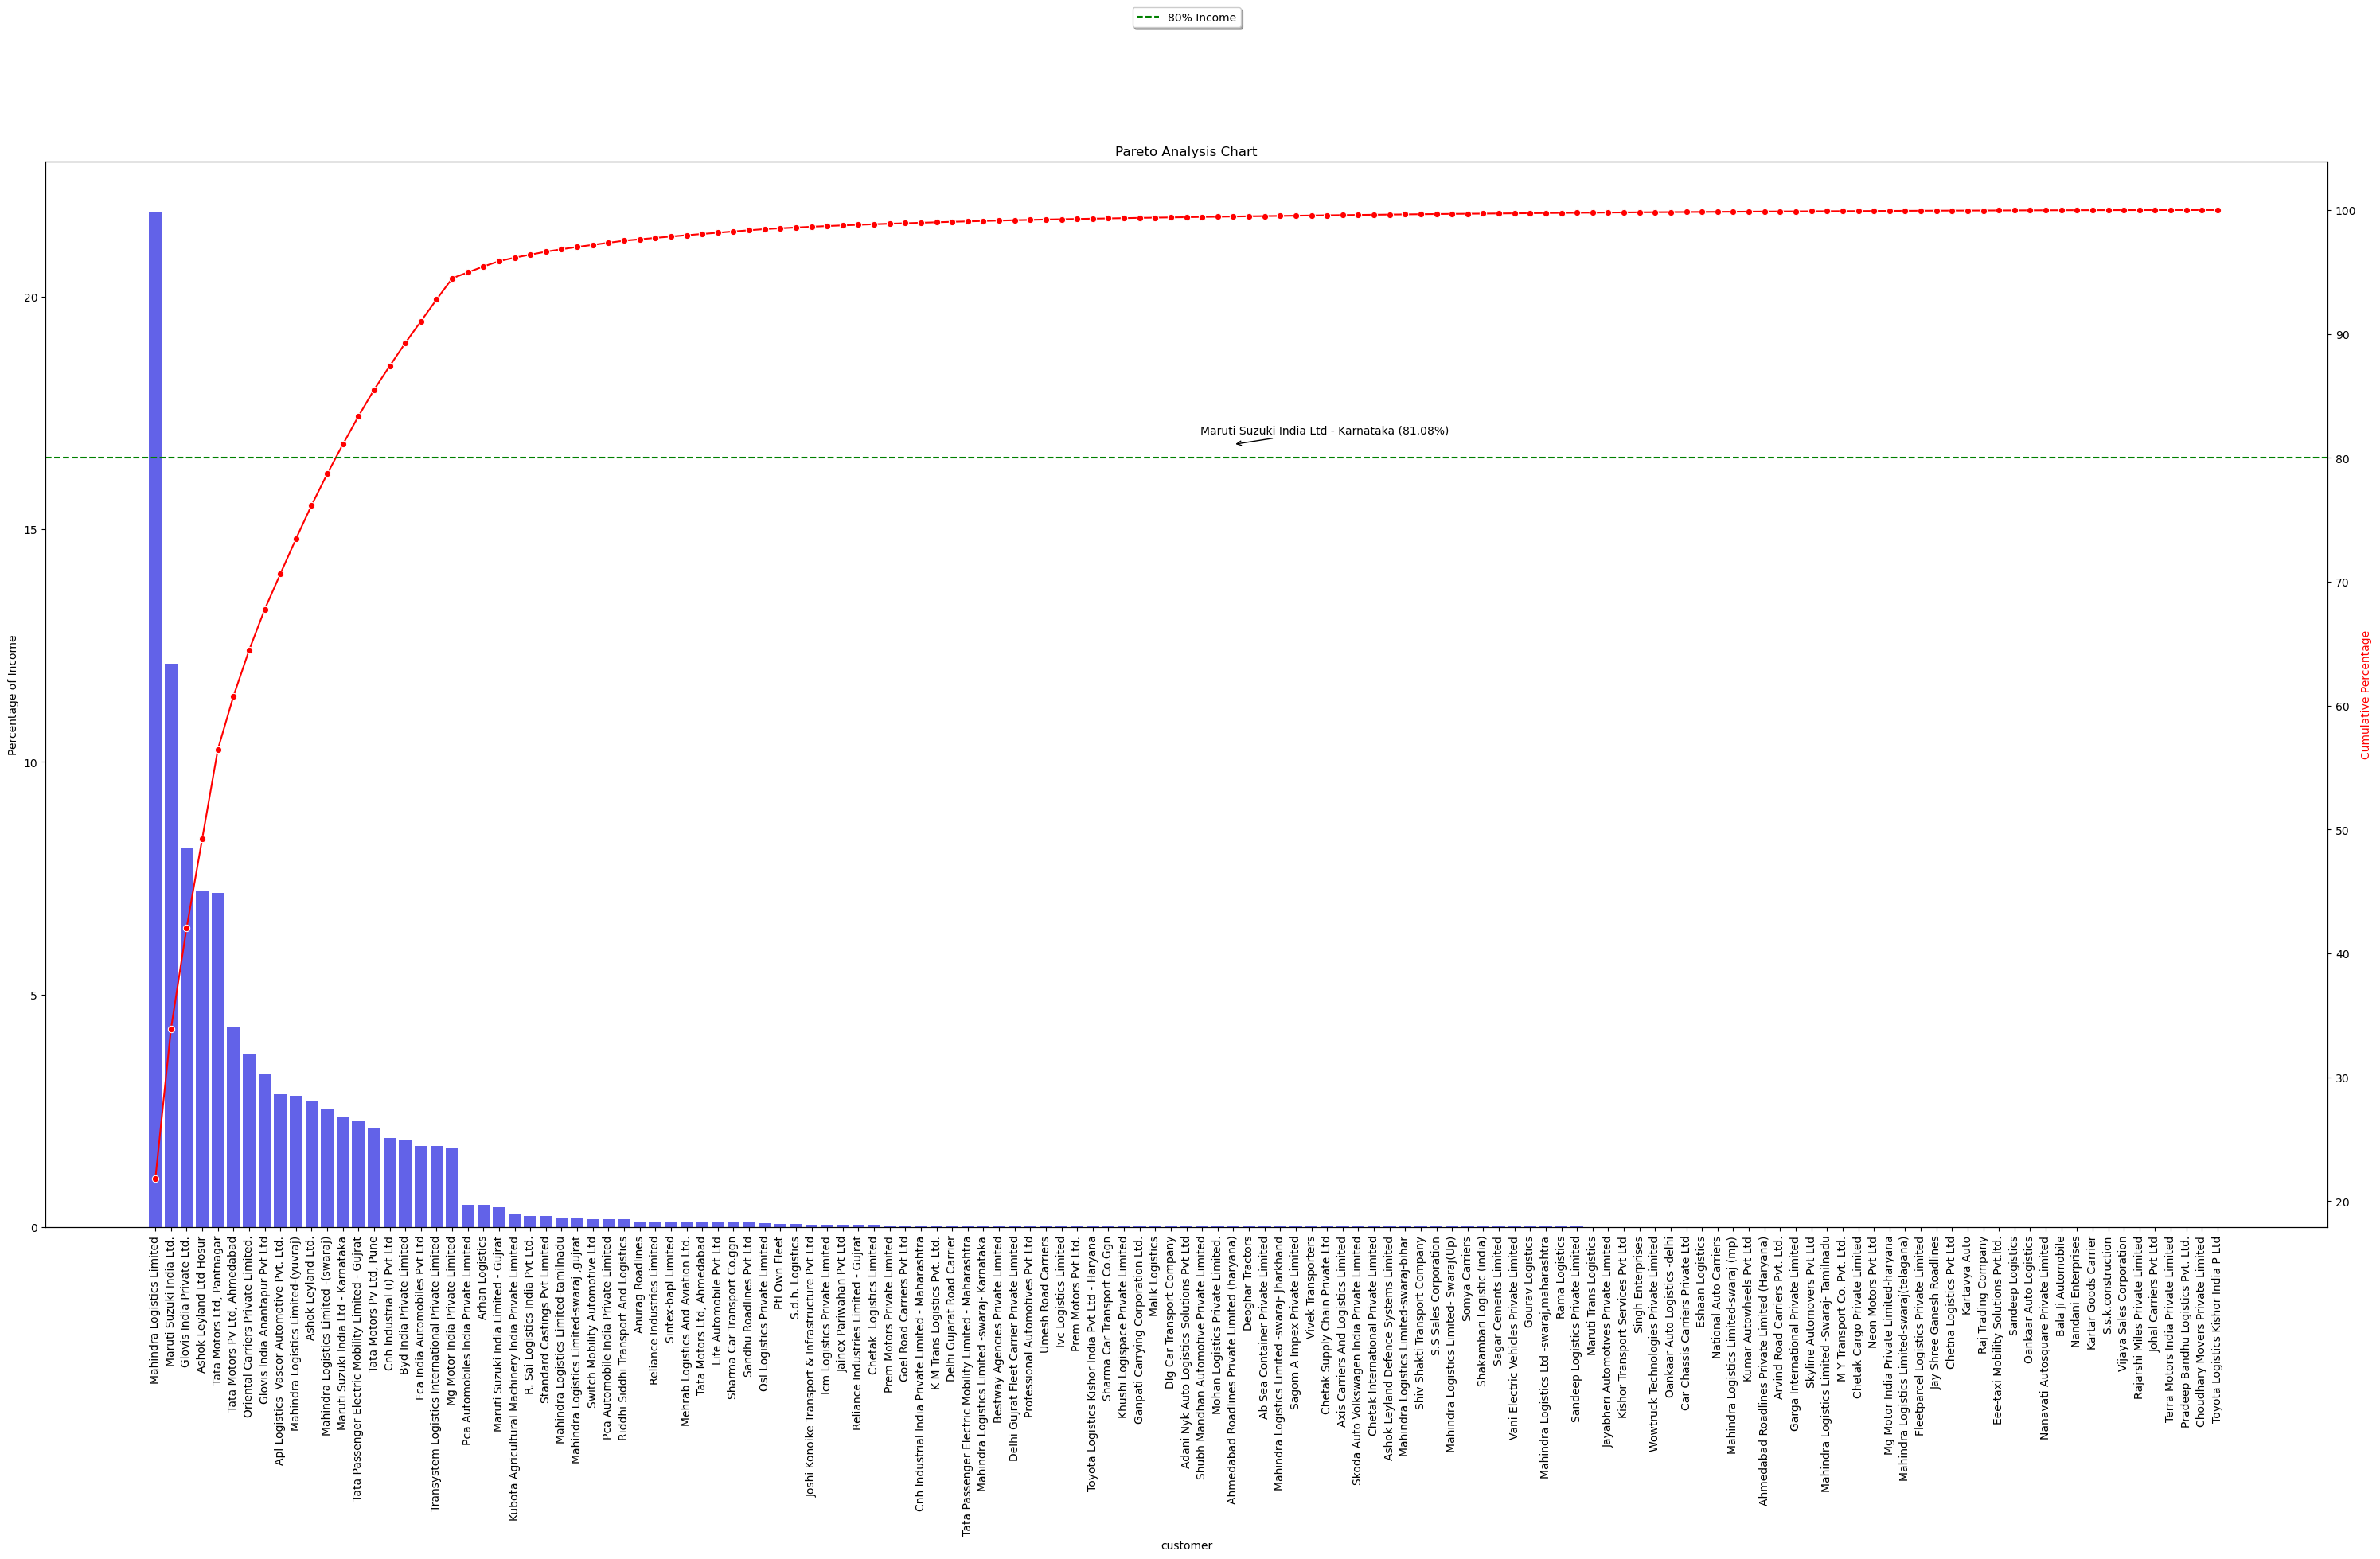

In [1046]:
# Sort the DataFrame by 'prcnt_income' in descending order
customer_df = customer_df.sort_values('prcnt_income', ascending=False)

# Calculate the cumulative percentage
customer_df['cumulative_percentage'] = (customer_df['prcnt_income'].cumsum() / customer_df['prcnt_income'].sum()) * 100

# Set the size of the chart using Seaborn
plt.figure(figsize=(30, 20))  # Adjust the size as needed

# Create the bar plot for 'prcnt_income' using Seaborn
sns.barplot(x='customer', y='prcnt_income', data=customer_df, color='b', alpha=0.7)
plt.ylabel('Percentage of Income')

# Rotate x-axis labels vertically to avoid overlap
plt.xticks(rotation=90)

# Create the secondary y-axis for the cumulative percentage
ax2 = plt.twinx()
sns.lineplot(x='customer', y='cumulative_percentage', data=customer_df, color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')

# Highlight the point where 80% income is achieved
eighty_percent_index = customer_df[customer_df['cumulative_percentage'] >= 80].index[0]
eighty_percent_customer = customer_df.loc[eighty_percent_index, 'customer']
eighty_percent_income = customer_df.loc[eighty_percent_index, 'cumulative_percentage']
plt.axhline(y=80, color='g', linestyle='--', label='80% Income')
plt.annotate(f'{eighty_percent_customer} ({eighty_percent_income:.2f}%)', 
             xy=(eighty_percent_index, eighty_percent_income),
             xytext=(-30, 10),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Display the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=2)
plt.title('Pareto Analysis Chart')
plt.tight_layout()
plt.show()

#### Out of 133 total customers only 13 customers are responsible for 80 percent of revenue generated

In [1047]:
df.customer.nunique()

133